In [16]:
#importing libraries
import numpy as np
import pandas as pd

import gym
import time
from gym import spaces


In [17]:

class Enviroment(gym.Env):
  metadata = { 'render.modes': []}
  def __init__(self):
    self.os = spaces.Discrete(16) 
    self.action_s = spaces.Discrete(4) 
    self.max_timesteps =30   

  def reset(self):
    self.timestep = 0
    self.lm_pos = [0, 0] 
    self.goal_pos = [3,3] 
    self.reward = [0, 2] 
    self.rs = [1, 3] 
    self.rock = [0, 3]
    self.small_rock = [2, 2] 
    observation = self.lm_pos
    return observation
   
  def step(self, action):            
    if action == 0:
      self.lm_pos[1] = self.lm_pos[1] - 1  
    if action == 1:
      self.lm_pos[1] = self.lm_pos[1] + 1           
    if action == 2:
      self.lm_pos[0] = self.lm_pos[0] + 1           
    if action == 3:
      self.lm_pos[0] = self.lm_pos[0] - 1
    self.lm_pos = np.clip(self.lm_pos, 0, 3)  
    observation = self.lm_pos


    reward = -0.5
    if (self.lm_pos == self.goal_pos).all():
      reward = 400
    if (self.lm_pos == self.reward).all():
      reward = 3.0
    if (self.lm_pos == self.rock).all():
      reward = -75
    if (self.lm_pos == self.small_rock).all():
      reward = -30
    if (self.lm_pos == self.rs).all():
      reward = 1
  
    self.timestep = self.timestep+1
    done = True if (self.timestep >= self.max_timesteps) or (self.lm_pos == self.goal_pos).all() else False
    info = {}
    return observation, reward, done, info
  




#
A function that displays the current state of the agent's interaction with the environment.

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import widgets
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from operator import add

def render(env):
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.set_xlim(0, 4)
  ax.set_ylim(0, 4)
  img_size = (512,512)
  # Load the images and resize them to the desired size
  #images from google 
  lm_img = Image.open("lm.jpg").resize(img_size)
  goal_img = Image.open("goal.jpg").resize(img_size)
  lm_on_goal = Image.open("lm_goal.jpg").resize(img_size)

  #picture of small rock 
  small_rock_img = Image.open("big_rock.jpg").resize(img_size)
  #picture of lawnmover on rock 
  lm_on_rock = Image.open("lm_on_rock.jpg").resize(img_size)
  #picture of big rock 
  big_rock_img = Image.open("big_rock.jpg").resize(img_size)

  #picture of big reward 
  bz_img = Image.open("big_reward.jpg").resize(img_size)

  small_reward_img = Image.open("small_reward.jpg").resize(img_size)
  fuel_lm_img = Image.open("fuel_lm.jpg").resize(img_size)

  
  agent = AnnotationBbox(OffsetImage(lm_img, zoom = 0.075), list(map(add, env.lm_pos, [0.5, 0.5])), frameon = False)
  ax.add_artist(agent)

  if env.lm_pos[0] != env.goal_pos[0] or env.lm_pos[1] != env.goal_pos[1]:
    goal = AnnotationBbox(OffsetImage(goal_img, zoom = 0.12),list(map(add, env.goal_pos, [0.5, 0.5])), frameon = False)
    ax.add_artist(goal)    
  else:
    agent_on_goal_pos = AnnotationBbox(OffsetImage(lm_on_goal, zoom = 0.085), list(map(add, env.goal_pos, [0.5, 0.5])), frameon = False) 
    ax.add_artist(agent_on_goal_pos) 
  if env.lm_pos[0] != env.small_rock[0] or env.lm_pos[1] != env.small_rock[1]:
    small_rock = AnnotationBbox(OffsetImage(small_rock_img, zoom = 0.12),list(map(add, env.small_rock, [0.5, 0.5])), frameon = False) 
    ax.add_artist(small_rock)
  else:
    agent_on_small_rock = AnnotationBbox(OffsetImage(lm_on_rock, zoom = 0.085),list(map(add, env.small_rock, [0.5, 0.5])), frameon = False) 
    ax.add_artist(agent_on_small_rock) 

  if env.lm_pos[0] != env.rock[0] or env.lm_pos[1] != env.rock[1]:
    rock = AnnotationBbox(OffsetImage(big_rock_img, zoom = 0.1),list(map(add, env.rock, [0.5, 0.5])), frameon = False) 
    ax.add_artist(rock)  
  else:
    agent_on_rock = AnnotationBbox(OffsetImage(lm_on_rock, zoom = 0.085),list(map(add, env.rock, [0.5, 0.5])), frameon = False) 
    ax.add_artist(agent_on_rock)
  if env.lm_pos[0] != env.rs[0] or env.lm_pos[1] != env.rs[1]:
    rs = AnnotationBbox(OffsetImage(bz_img, zoom = 0.1),list(map(add, env.rs, [0.5, 0.5])), frameon = False) 
    ax.add_artist(rs)
  else:
    agent_on_rs = AnnotationBbox(OffsetImage(fuel_lm_img, zoom = 0.085),list(map(add, env.rs, [0.5, 0.5])), frameon = False) 
    ax.add_artist(agent_on_rs)
  if env.lm_pos[0] != env.reward[0] or env.lm_pos[1] != env.reward[1]:
    reward = AnnotationBbox(OffsetImage(small_reward_img, zoom = 0.1),list(map(add, env.reward, [0.5, 0.5])), frameon = False) 
    ax.add_artist(reward)
  else:
    agent_on_reward = AnnotationBbox(OffsetImage(fuel_lm_img, zoom = 0.085),list(map(add, env.reward, [0.5, 0.5])), frameon = False) 
    ax.add_artist(agent_on_reward)
  

  ax.set_xticks([0, 1, 2, 3, 4])
  ax.set_yticks([0, 1, 2, 3, 4])

  ax.grid()
  

In [ ]:

def get_policy(sarsa_table):
  policy = {}
  for i in range(4):
    for j in range(4):
      policy[(i, j)] = np.argmax(sarsa_table[i,j,:])
  return policy 

Defining the Random Agent

In [22]:

class generateAgent:
  def __init__(self, env):
    self.env = env
    self.os = env.os
    self.action_s = env.action_s

  def step(self, observation):
    return np.random.choice(self.action_s.n)     


#
Executing an environment with a random agent for a minimum of 10 time steps to confirm that the logic of the environment is accurately defined. Output the current state, the action selected, the reward received, and present a visual representation of the grid world for each step.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 0 Directon: right State:  [1 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 1 Directon: left State:  [0 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 2 Directon: down State:  [0 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 3 Directon: left State:  [0 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 4 Directon: right State:  [1 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 5 Directon: up State:  [1 1] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 6 Directon: down State:  [1 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 7 Directon: right State:  [2 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 8 Directon: right State:  [3 0] Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 9 Directon: down State:  [3 0] Reward:  -0.5


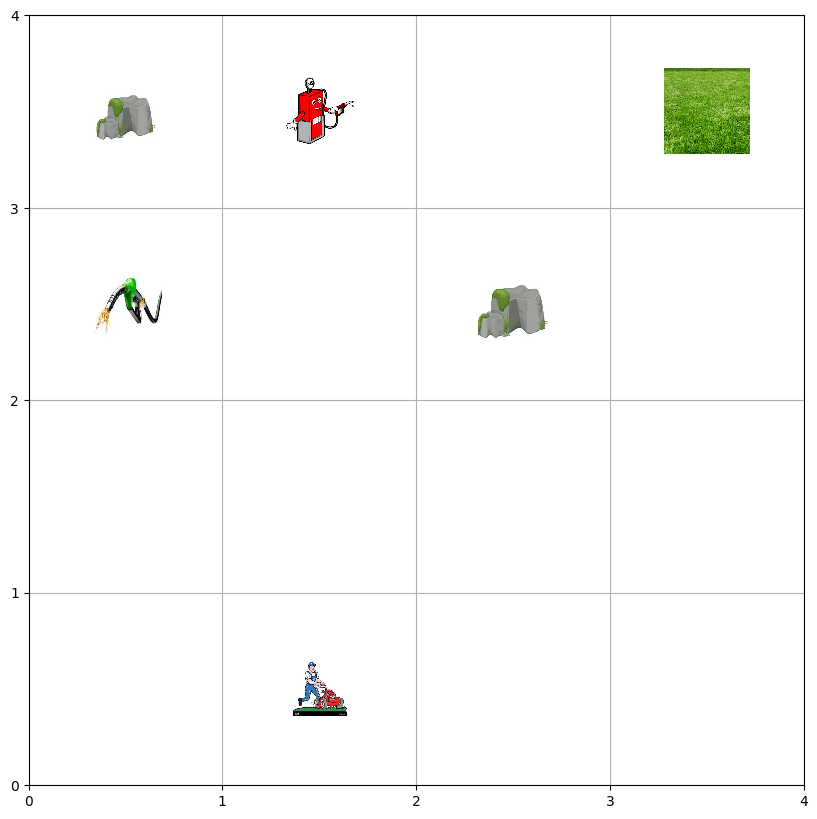

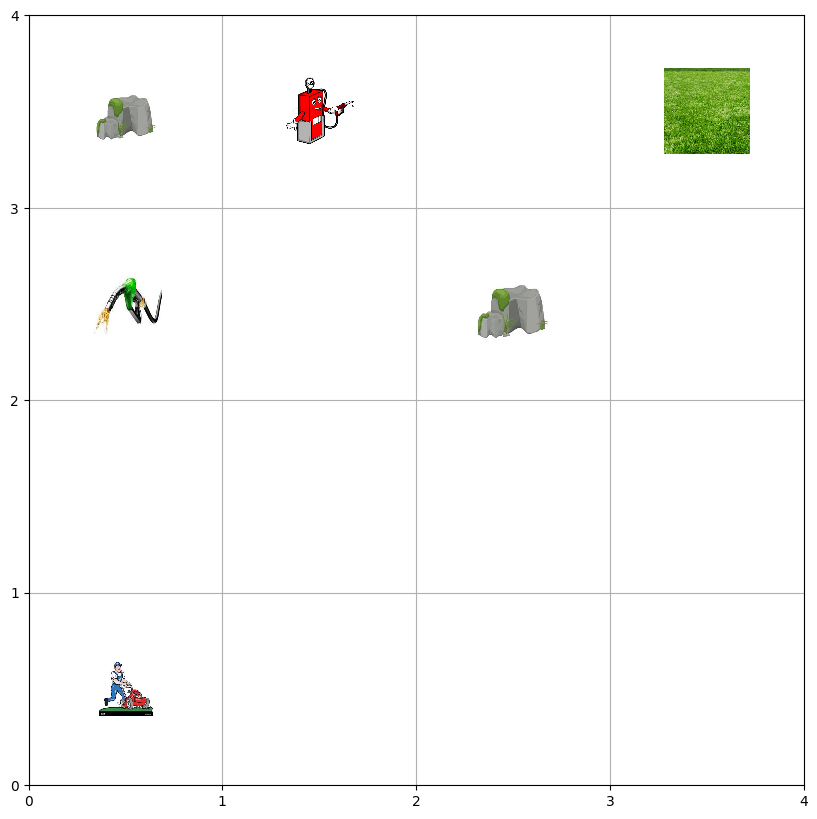

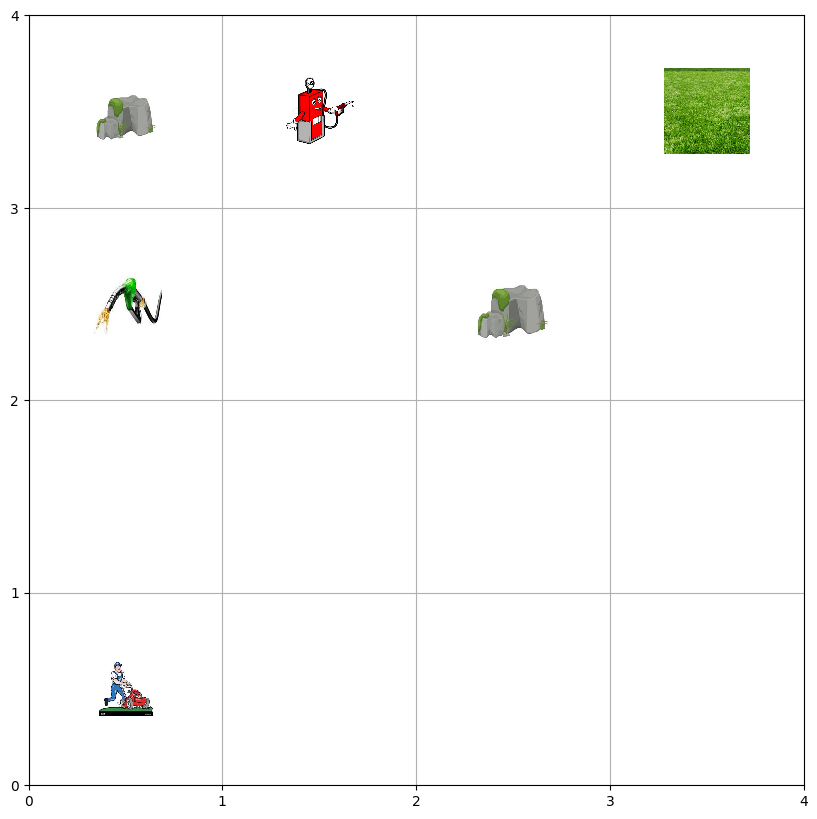

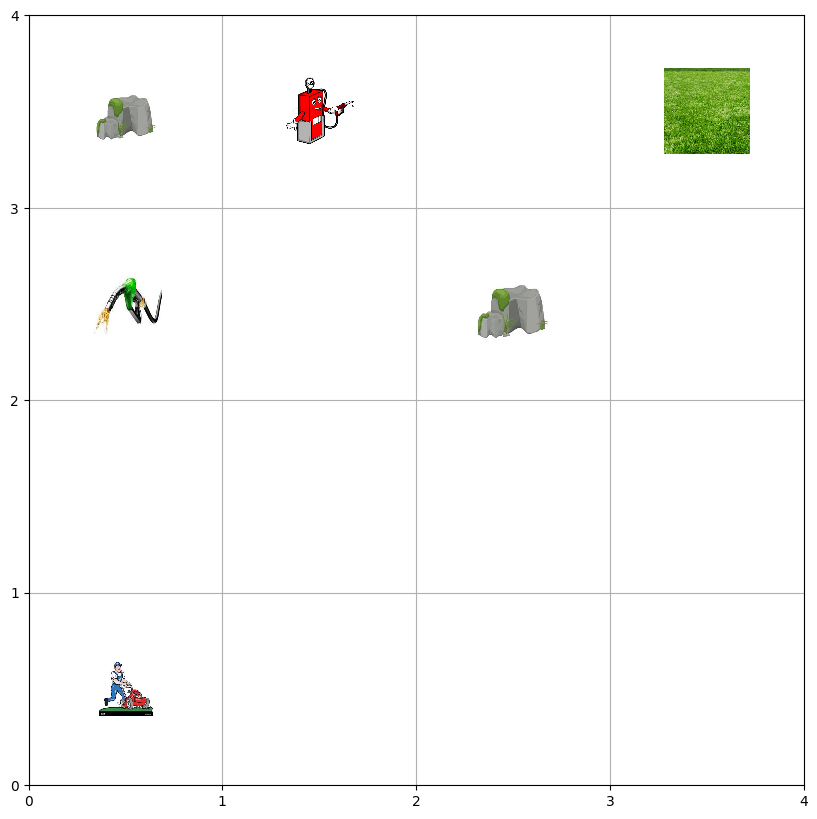

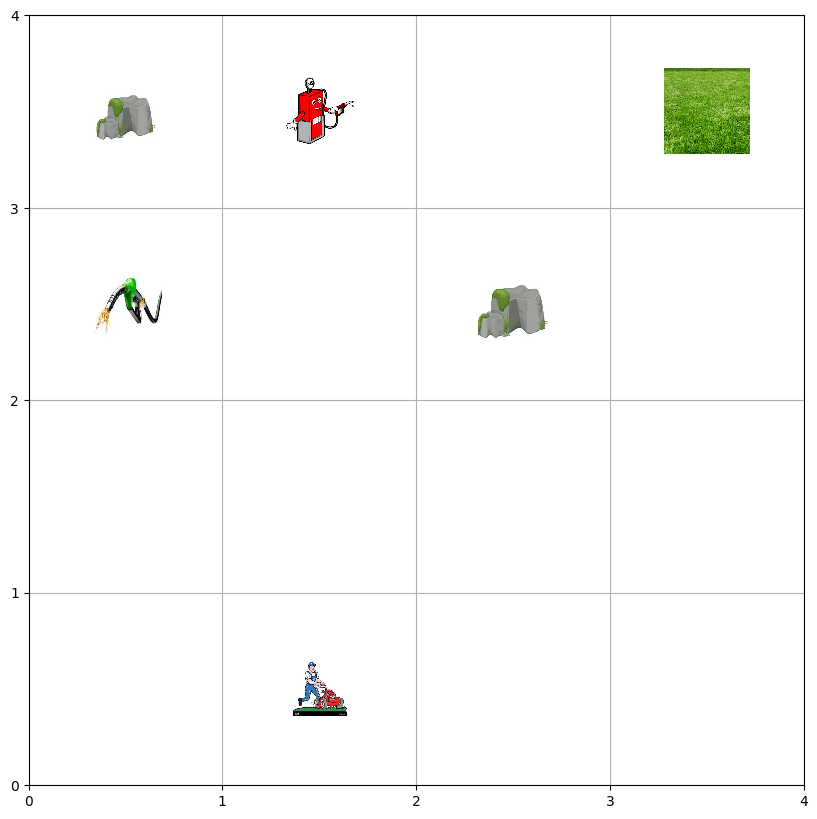

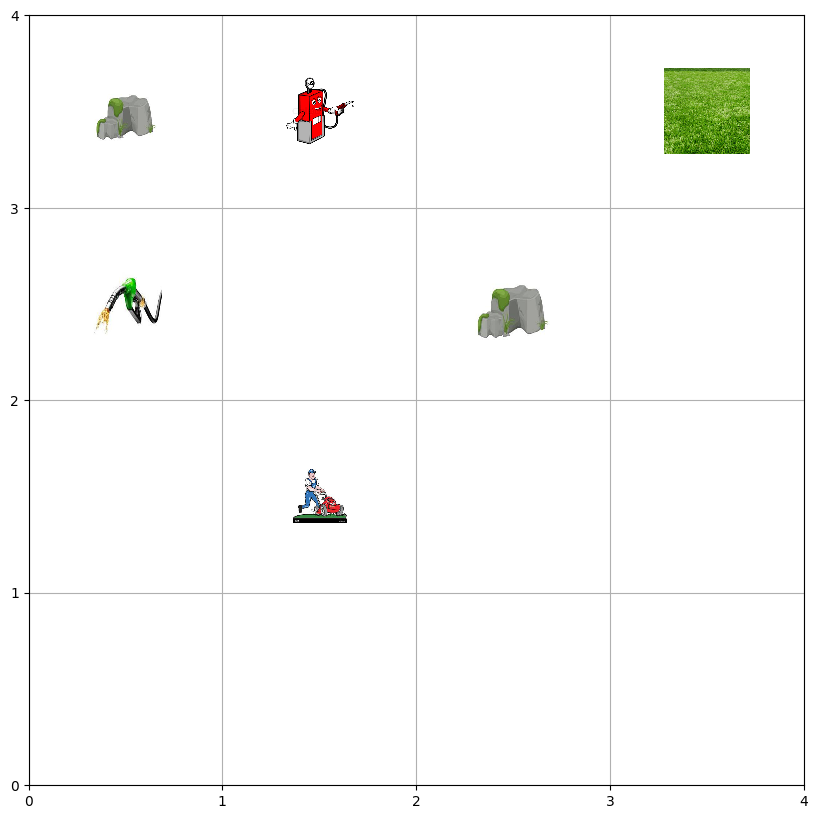

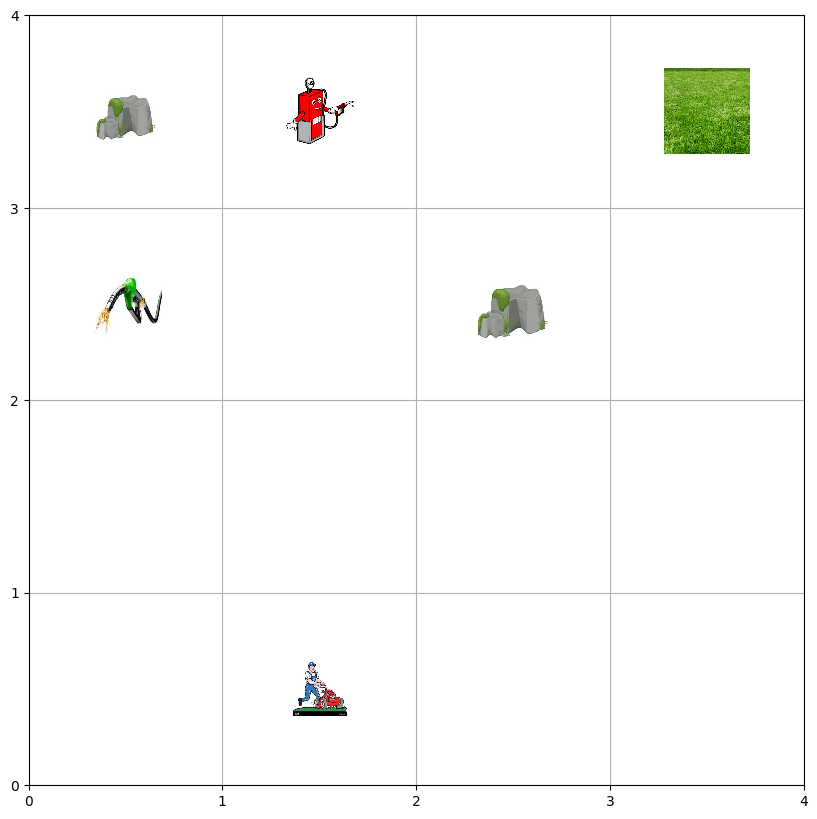

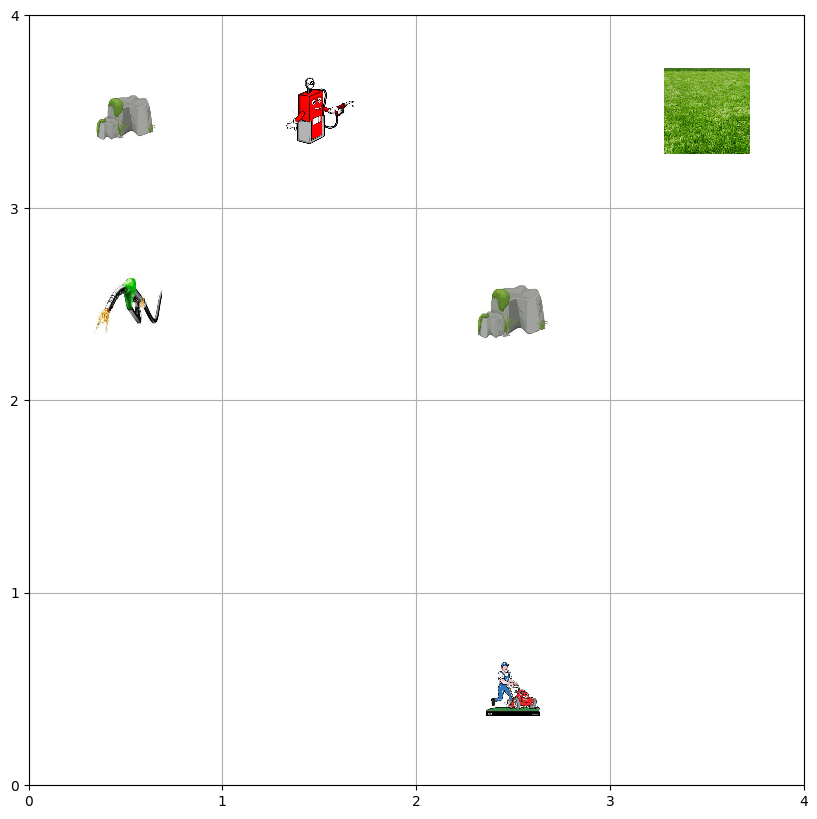

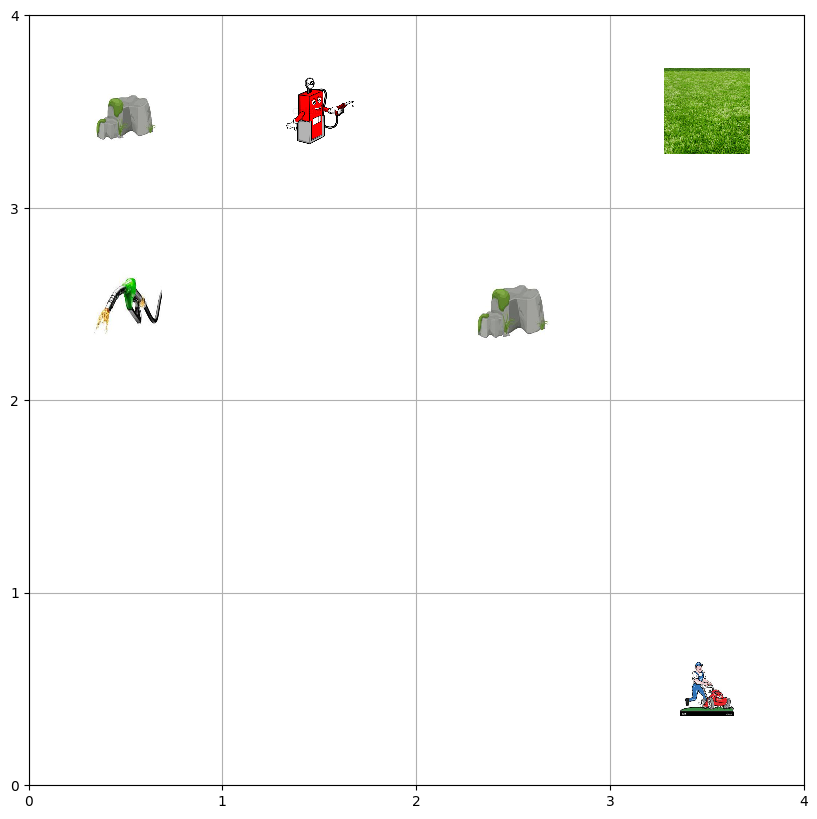

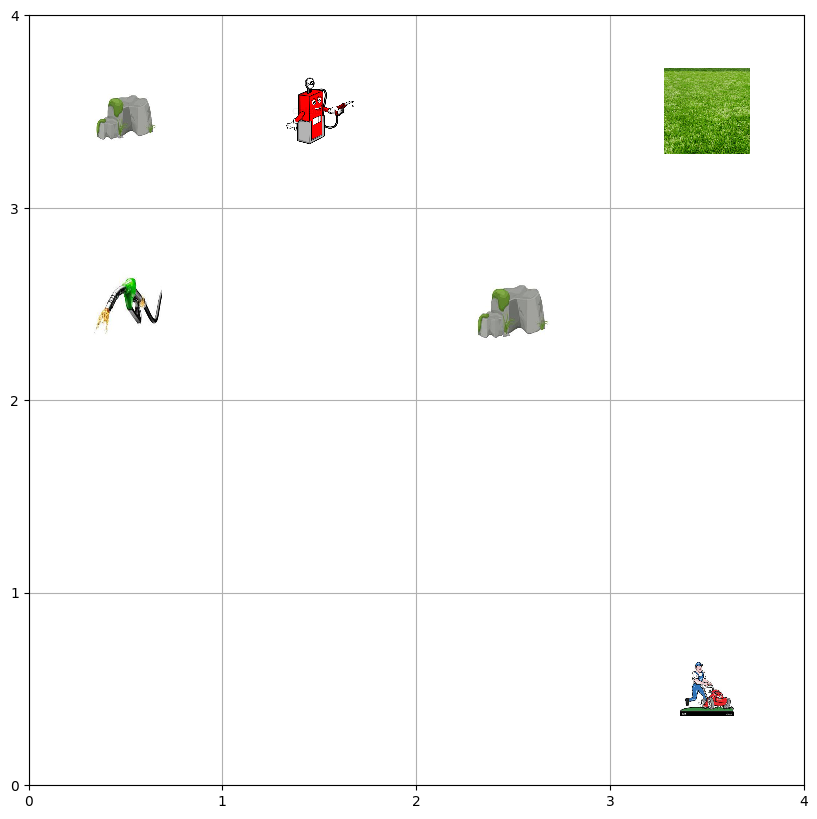

In [23]:
p = 0
env = Enviroment()
agent = generateAgent(env)
og = widgets.Grid(1, 1)
env.reset()
obs = env.reset()
done = False

action_list = ["down","up","right","left"]
for i in range(10):
  a = agent.step(obs)
  obs, reward, done, _ = env.step(a)
  with og.output_to(0, 0):
    og.clear_cell()
    render(env)
  print(f"Step Number: {p} Directon: {action_list[a]} State:  {obs} Reward:  {reward}")
  p = p + 1


#training using a greedy policy to update the Q-value

In [6]:
import numpy as np

def train():
  # Initialize Q-value function with small random values
  q_values = np.zeros([4, 4, env.action_s.n])

  # Initialize starting state
  state = 0

  # Decay rate 
  d = 0.0005

  # Define epsilon for epsilon-greedy policy
  epsilon = 0.1

  # Define learning rate alpha and discount factor gamma
  alpha = 0.5
  gamma = 0.9

  # Store the values for each episode
  reward_values = []
  epsilon_values = []

  # Repeat for each episode
  for episode in range(2000):
      env.reset()
      pos = np.array([0, 0])
      done = False
      totalreward = 0

      # Choose action using epsilon-greedy policy

      if np.random.random() > epsilon:
          action =  np.argmax(pos)
      else:
          action = np.random.choice(env.action_s.n, 1)[0]

      done = 0
      while not done:
          obs, reward, done, info = env.step(action)


          # Choose next action using same epsilon-greedy policy
          if np.random.random() > epsilon:
              next_action = np.argmax(q_values[pos[0], pos[1]])
          else:
              next_action = np.random.choice(env.action_s.n, 1)[0]

          # Update Q-values using SARSA algorithm
          target = reward + (gamma * q_values[obs[0], obs[1], next_action])
          newvalue = q_values[pos[0], pos[1], action] + alpha * (target - q_values[pos[0], pos[1], action])
          q_values[pos[0], pos[1], action] =  newvalue

          # Update current state and action
          pos = obs
          pos = np.clip(pos, 0, 3)
          action = next_action
          totalreward = totalreward + reward

      reward_values.append(totalreward)
      epsilon_values.append(epsilon)
      epsilon = (1-d) * epsilon

  return q_values




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 1, Directon: right, State:  [1 0], Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 2, Directon: up, State:  [1 1], Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 3, Directon: right, State:  [2 1], Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 4, Directon: right, State:  [3 1], Reward:  -0.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step Number: 5, Directon: up, State:  [3 2], Reward:  -0.5
rewards collected:  -2.5


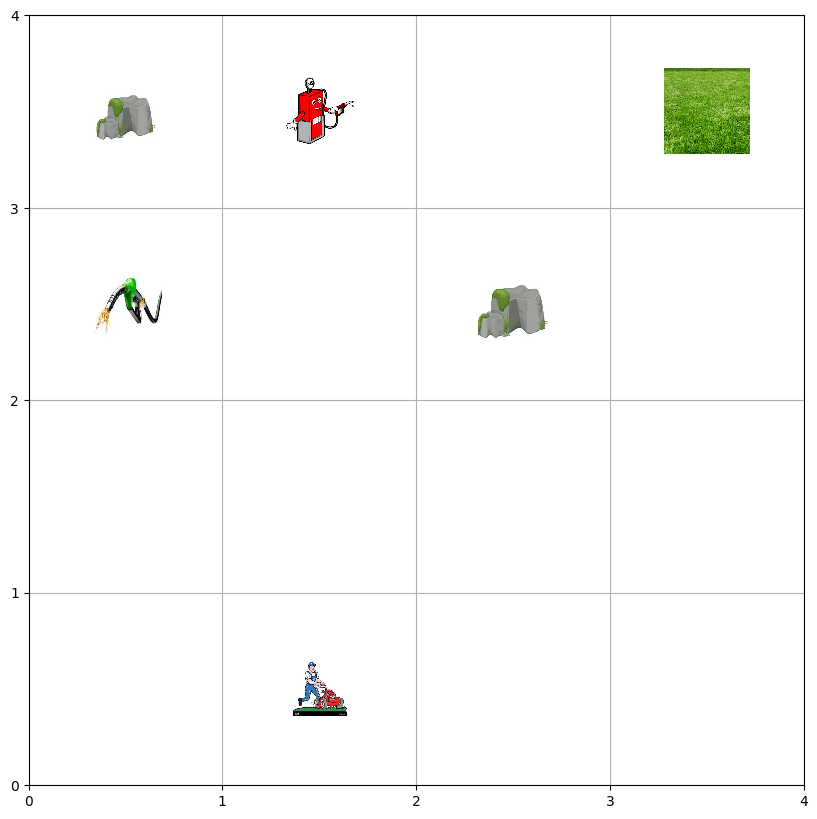

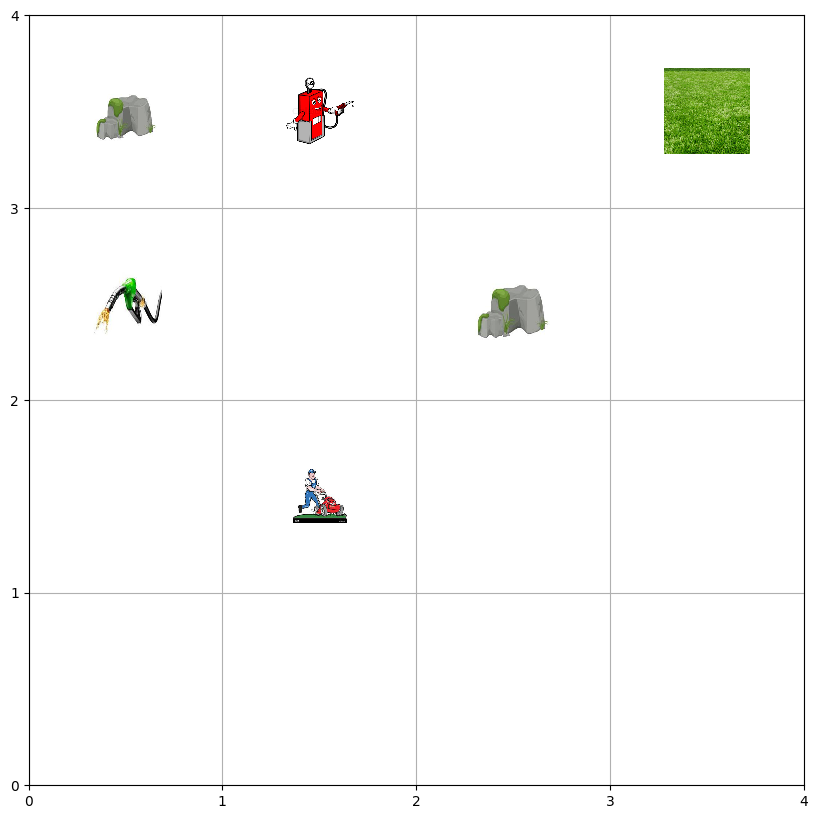

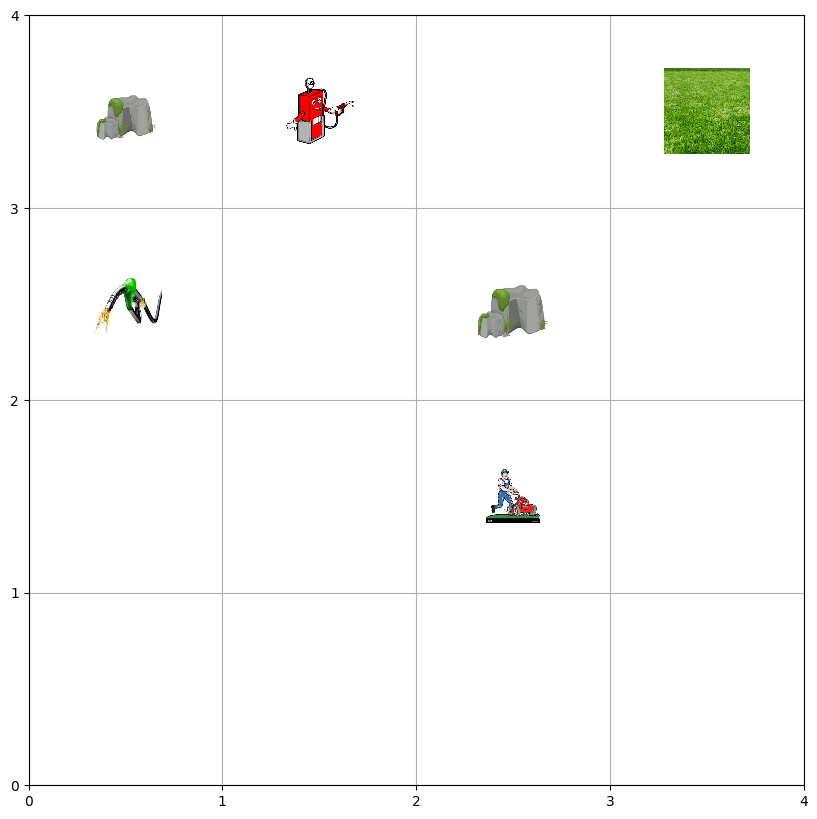

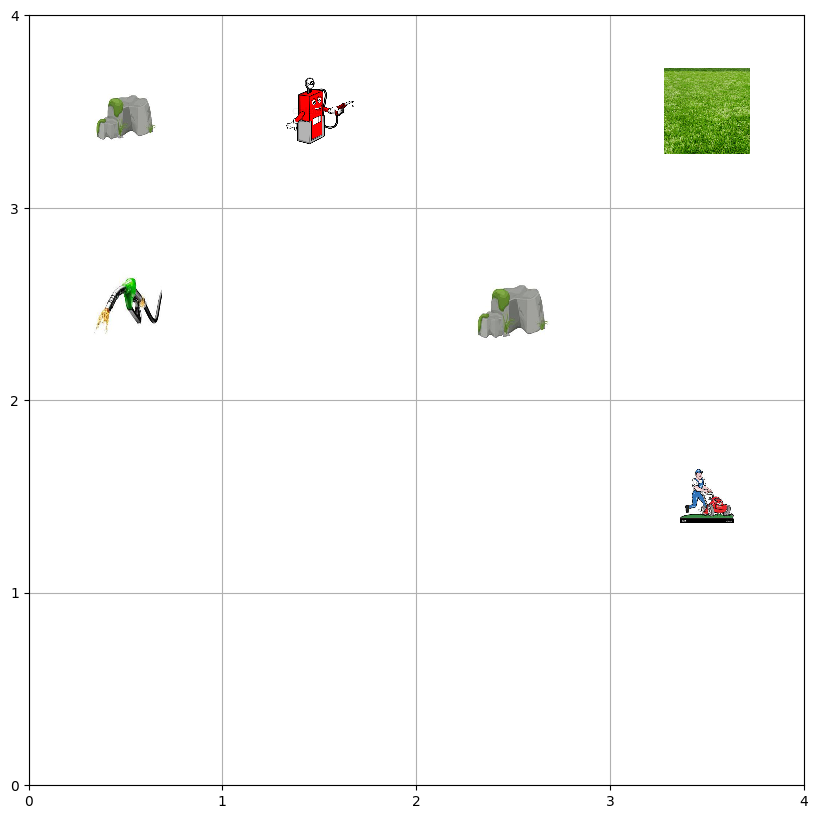

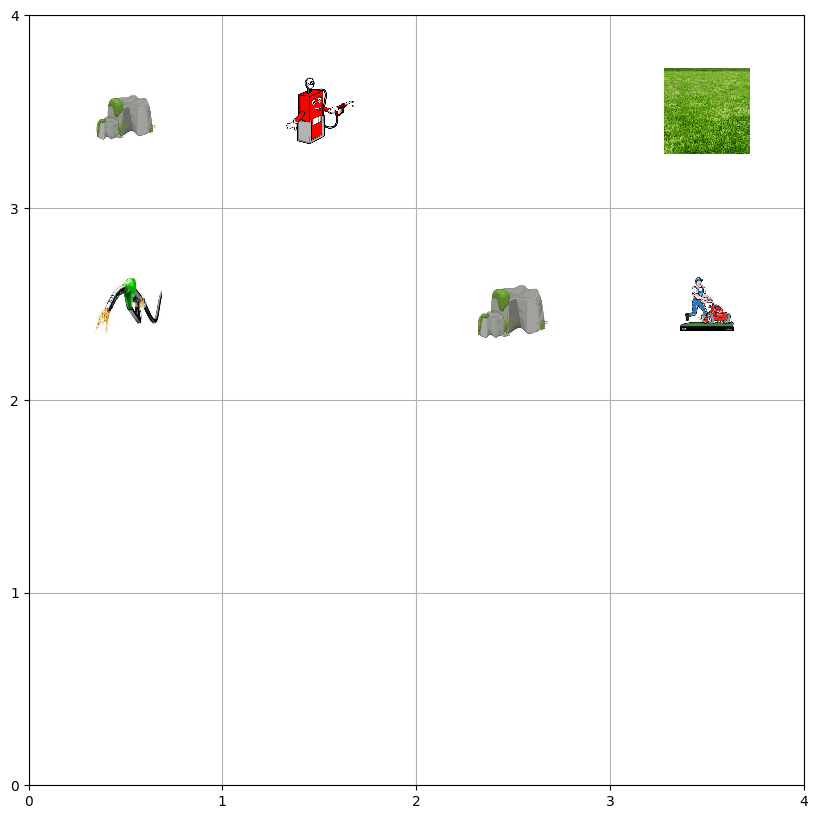

In [27]:
env = Enviroment()
obs = env.reset()
sarsa_table = train()
policy = get_policy(sarsa_table)
obs = env.reset()
done = False
rewards = 0

for i in range(1,1000):
  a = policy[(obs[0], obs[1])]
  obs, reward, done, _ = env.step(a)
  if(done == True):
    break
  rewards = rewards + reward
  with og.output_to(0, 0):
    og.clear_cell()
    render(env)
  print(f"Step Number: {i}, Directon: {action_list[a]}, State:  {obs}, Reward:  {reward}")

print(f"rewards collected:  {rewards}")

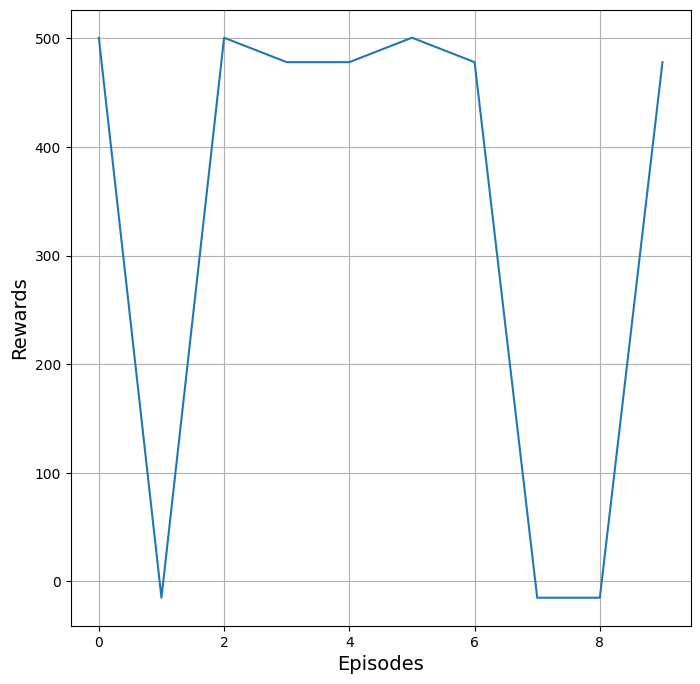

In [ ]:
rewards = []

for i in range(10):
  sarsa_table = train()
  policy = get_policy(sarsa_table)

  obs = env.reset()
  done = False
  cc = 0
  while not done:
    a = policy[(obs[0], obs[1])]
    obs, reward, done, _ = env.step(a)
    cc = cc + reward
  rewards.append(cc)

figure, plots = plt.subplots(1, 1, figsize = (8, 8))
plots.plot(rewards, label='Total Reward Per Run')
plots.grid()
plots.set_xlabel('Episodes', fontsize=14)
plots.set_ylabel('Rewards', fontsize=14)
plt.show()

In [ ]:
import numpy as np
def train(decay,alpha,epoch):
  # Initialize Q-value function with small random values
  q_values = np.zeros([4, 4, env.action_s.n])

  # Initialize starting state
  state = 0

  # Define epsilon for epsilon-greedy policy
  epsilon = 0.1
  gamma = 0.9

  # Store the values for each episode
  reward_values = []
  epsilon_values = []

  # Repeat for each episode
  for episode in range(epoch):
      env.reset()
      pos = np.array([0, 0])
      done = False
      totalreward = 0

      # Choose action using epsilon-greedy policy

      if np.random.random() > epsilon:
          action =  np.argmax(pos)
      else:
          action = np.random.choice(env.action_s.n, 1)[0]

      done = 0
      while not done:
          obs, reward, done, info = env.step(action)


          # Choose next action using same epsilon-greedy policy
          if np.random.random() > epsilon:
              next_action = np.argmax(q_values[pos[0], pos[1]])
          else:
              next_action = np.random.choice(env.action_s.n, 1)[0]

          # Update Q-values using SARSA algorithm
          target = reward + (gamma * q_values[obs[0], obs[1], next_action])
          newvalue = q_values[pos[0], pos[1], action] + alpha * (target - q_values[pos[0], pos[1], action])
          q_values[pos[0], pos[1], action] =  newvalue

          # Update current state and action
          pos = obs
          pos = np.clip(pos, 0, 3)
          action = next_action
          totalreward = totalreward + reward

      reward_values.append(totalreward)
      epsilon_values.append(epsilon)
      epsilon = (1-d) * epsilon
  #plotting the graph wrt to reward and hyperparameters 
  fig, axs = plt.subplots(ncols=2, figsize=(18, 8))
  ax1 = axs[0]
  ax1.plot(epsilon_values, label='Epsilon Decay')
  ax1.grid()
  ax1.set_xlabel('Epoch', fontsize=14)
  ax1.set_ylabel('Epsilon', fontsize=14)
  ax1.set_title('Episilon Decay \n  for %d Epoch \n with Alpha %f and Gamma: %f' %(episode, alpha, gamma), fontsize=16)
  ax1.legend(loc='lower right', fontsize = 12)
  
  ax2 = axs[1]
  ax2.plot(reward_values, label='Total Rewards')
  ax2.grid()
  ax2.set_xlabel('Epoch', fontsize=14)
  ax2.set_ylabel('Total Reward', fontsize=14)
  ax2.set_title('Total Rewards \n  for %d Epoch \n with Alpha %f and Gamma: %f' %(episode, alpha, gamma), fontsize=16)
  ax2.legend(loc='lower right', fontsize = 12)
  
  plt.show()





/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


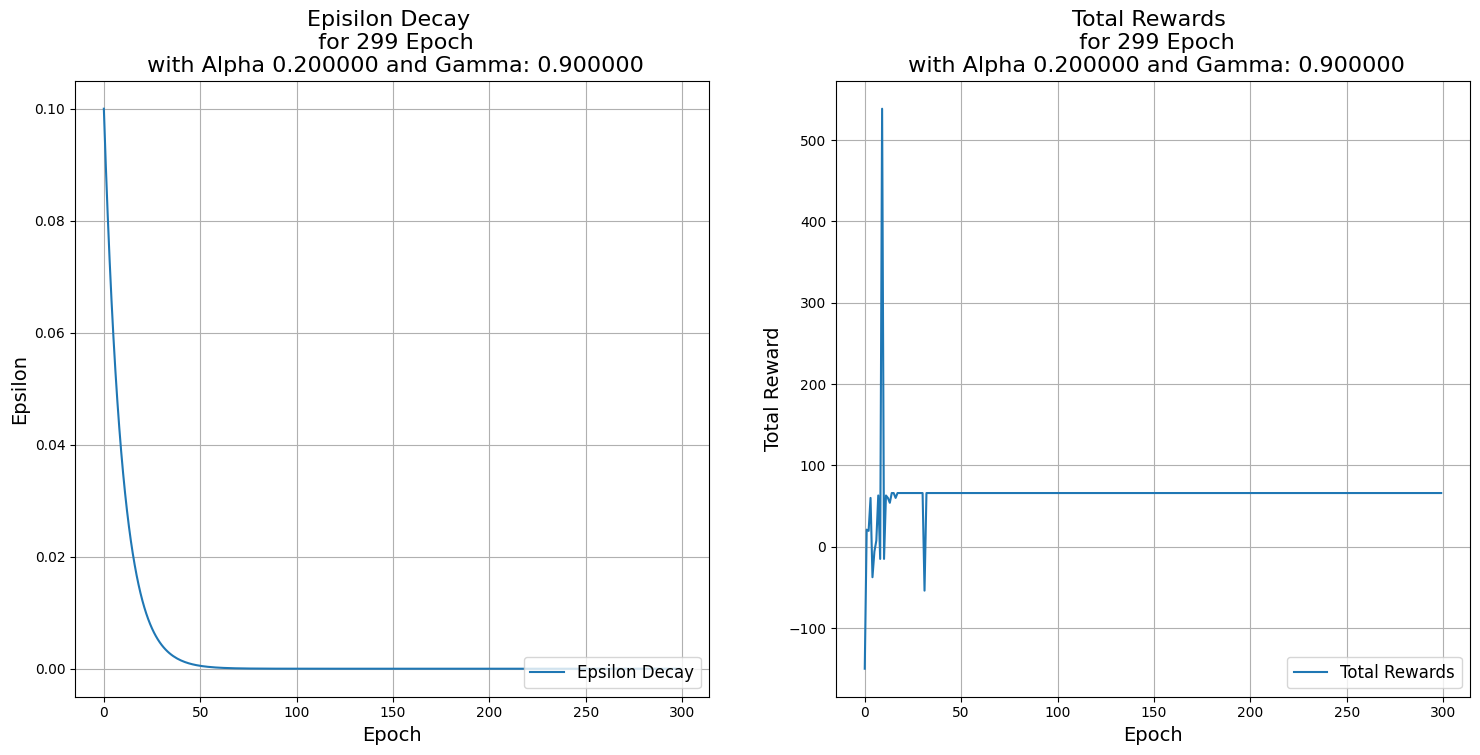

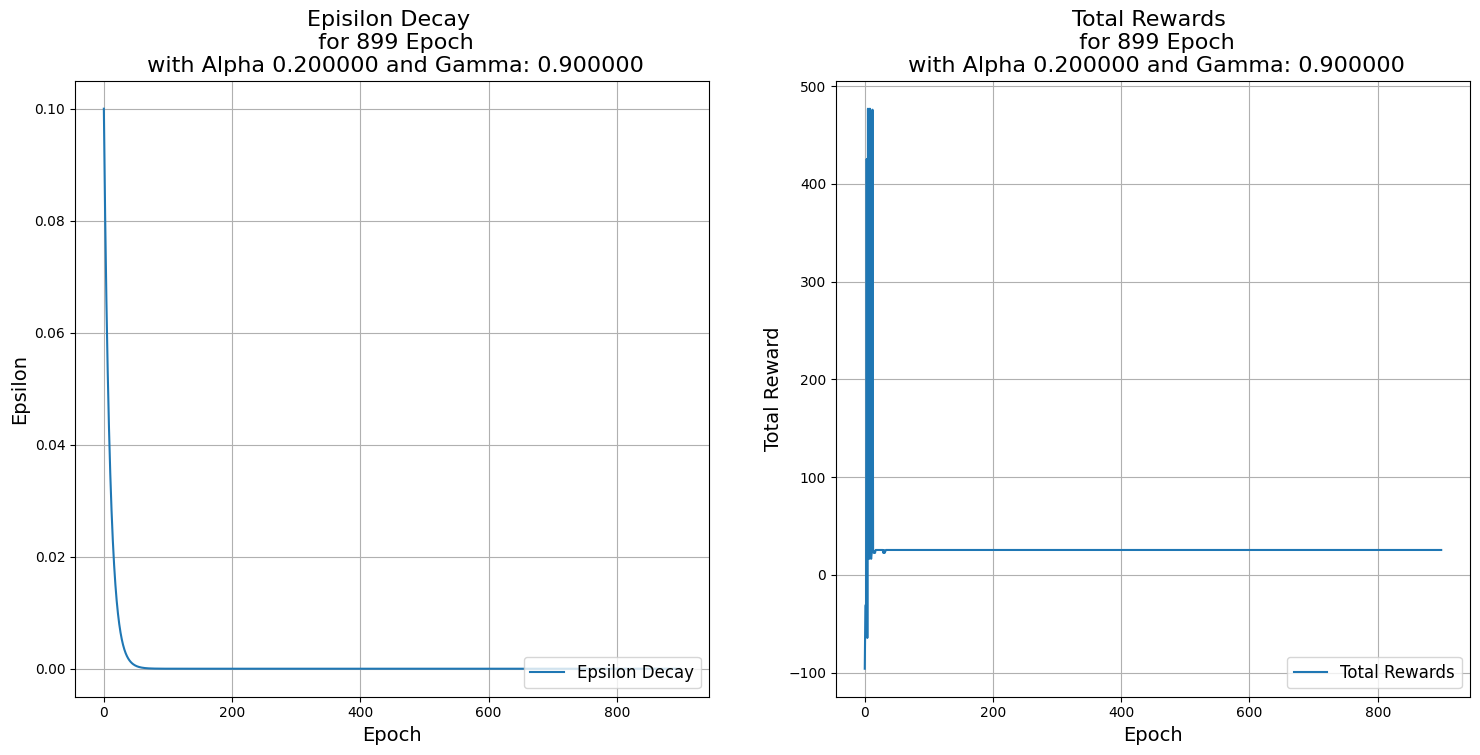

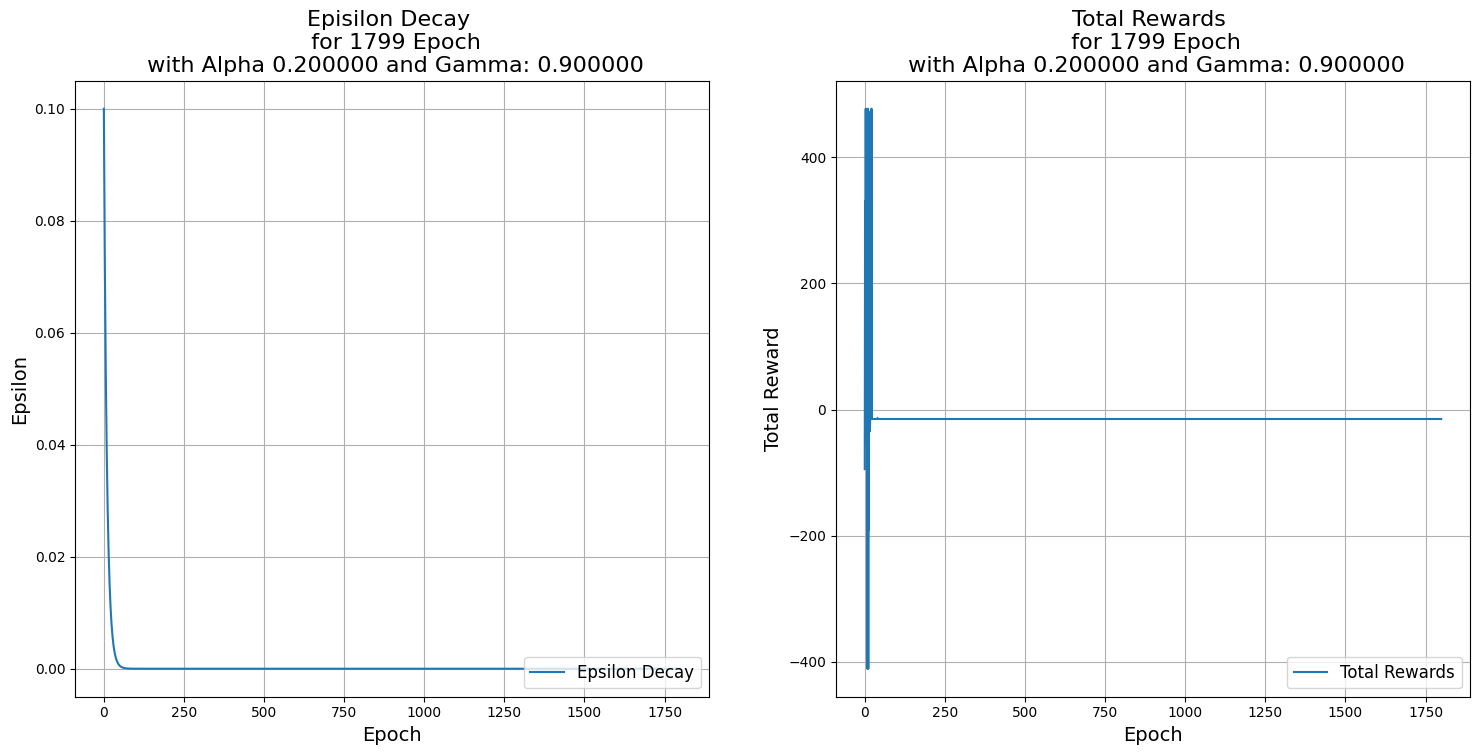

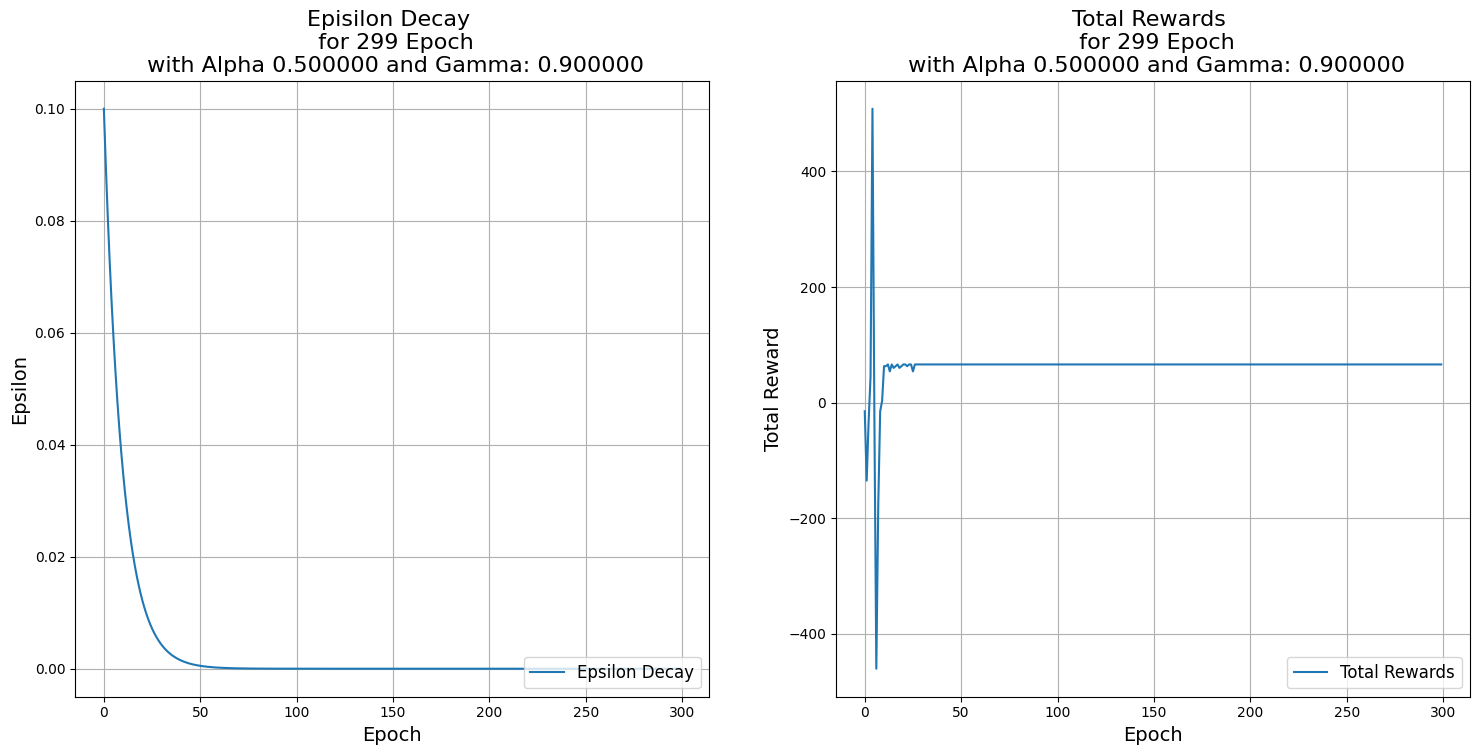

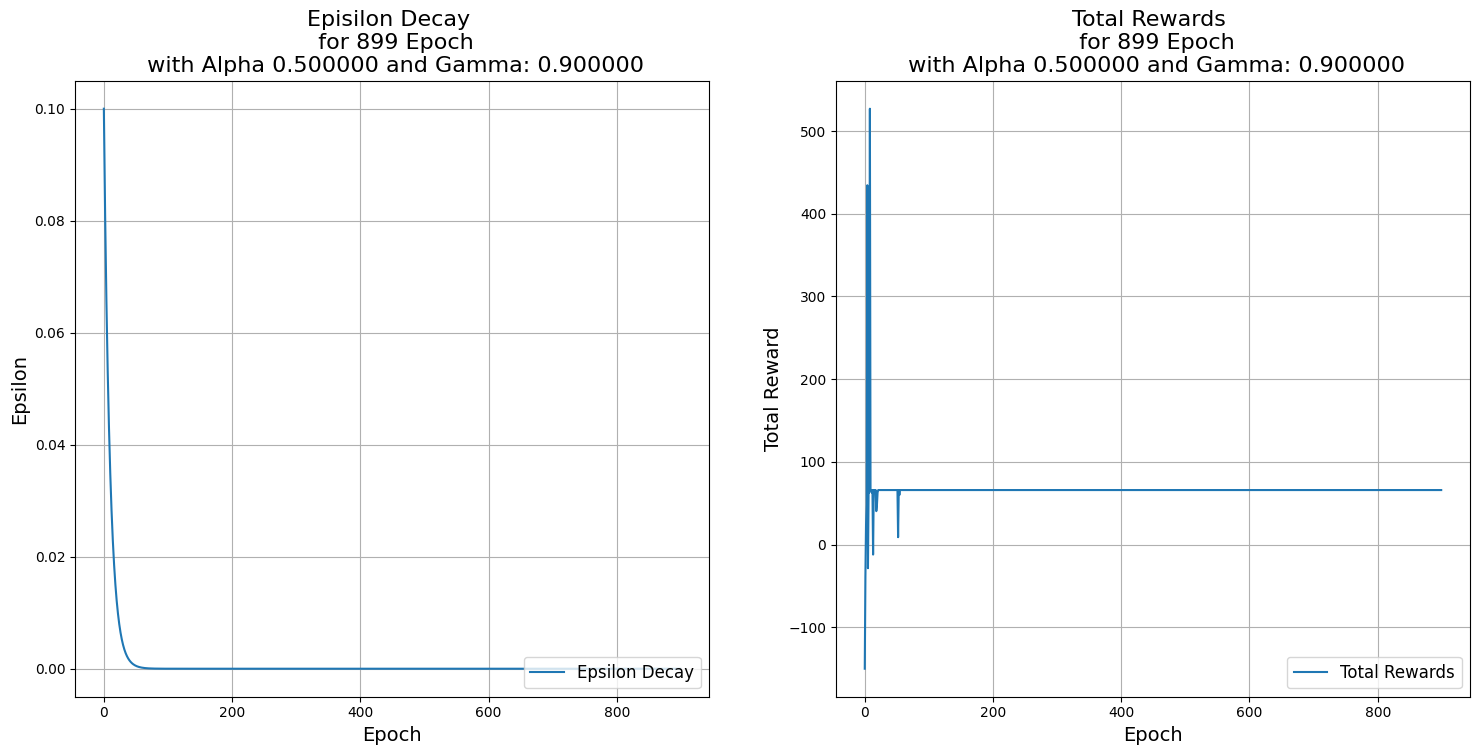

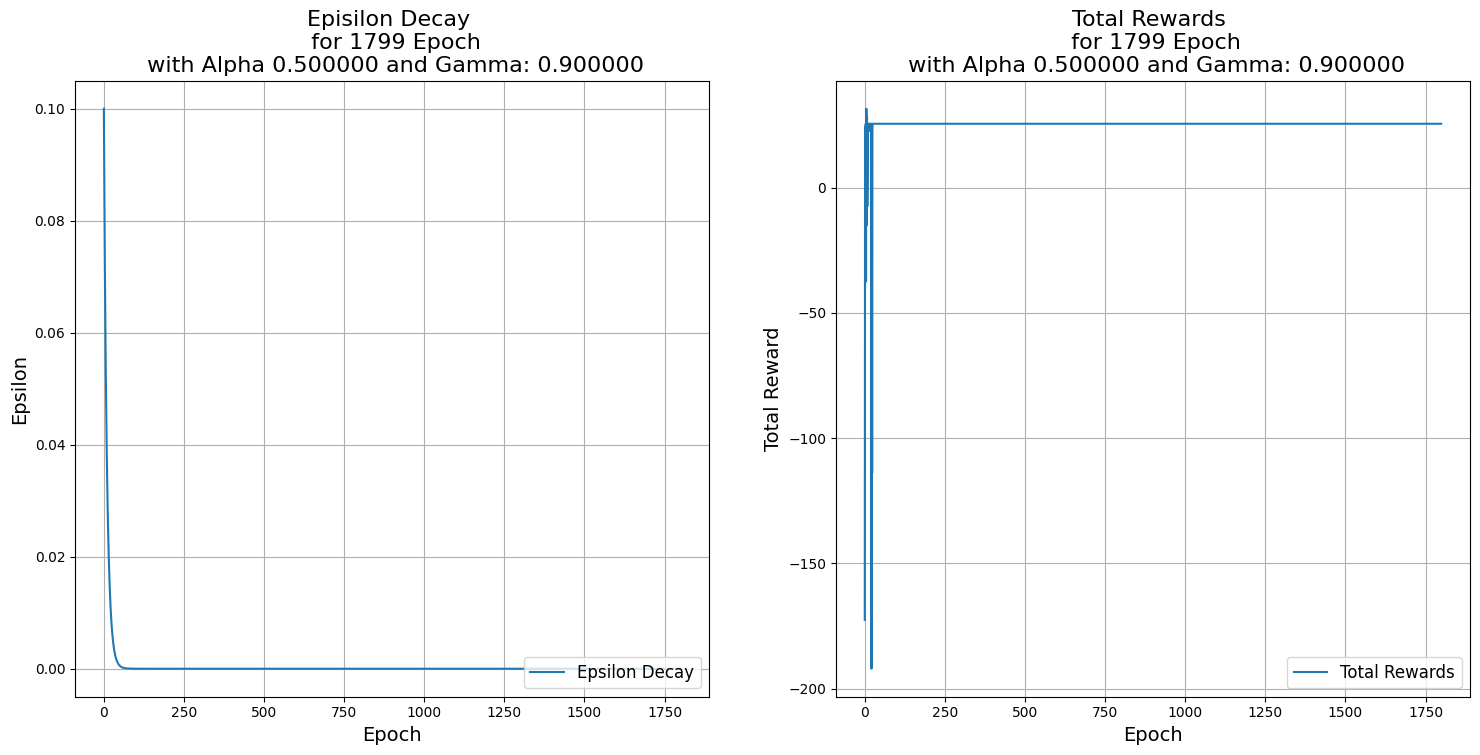

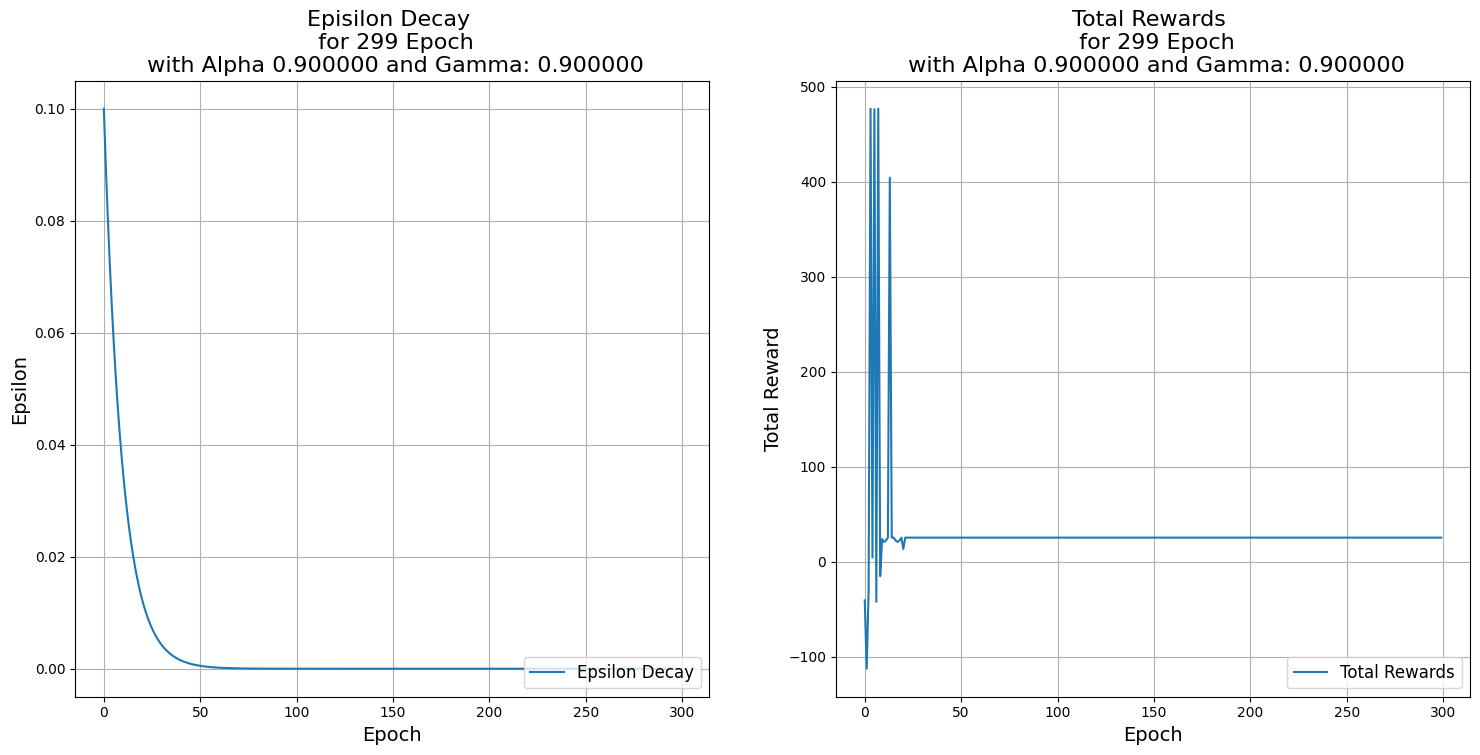

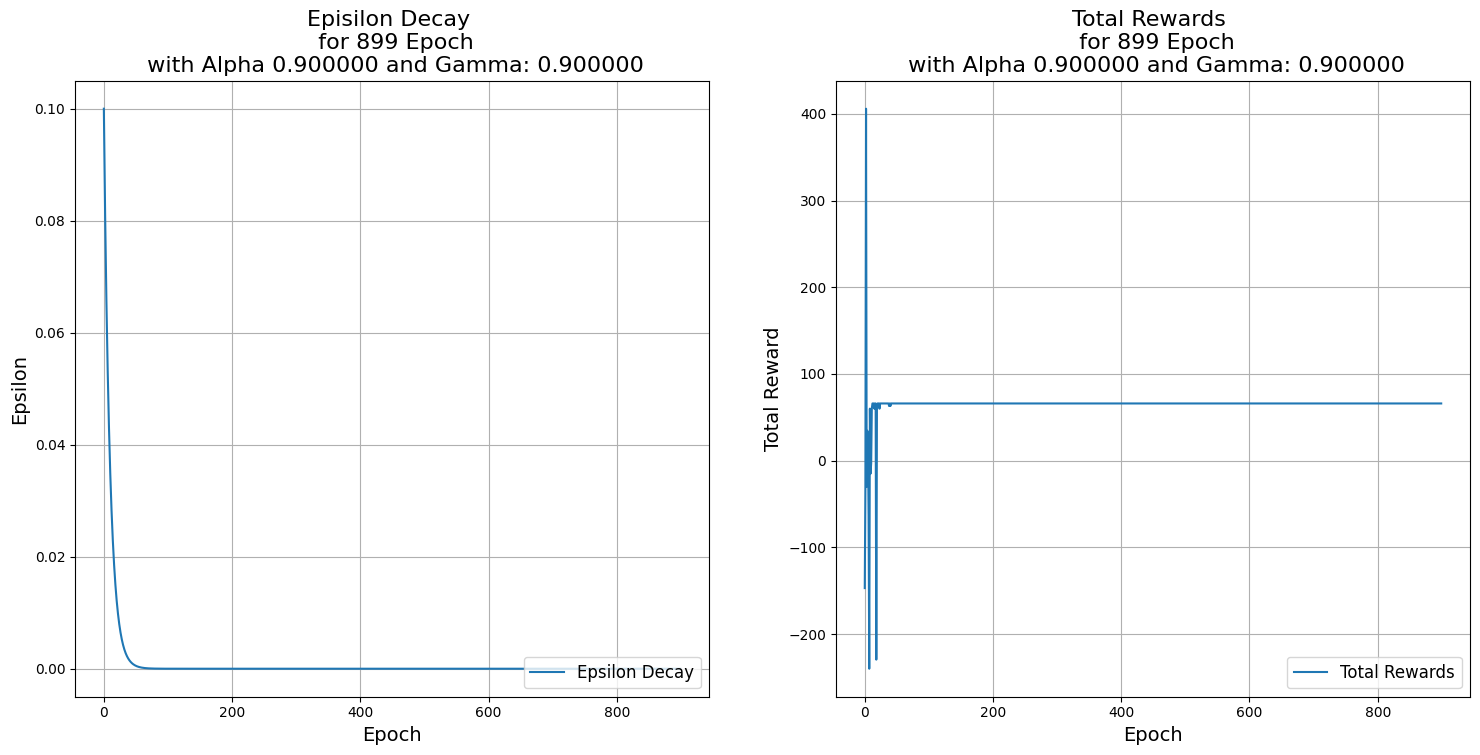

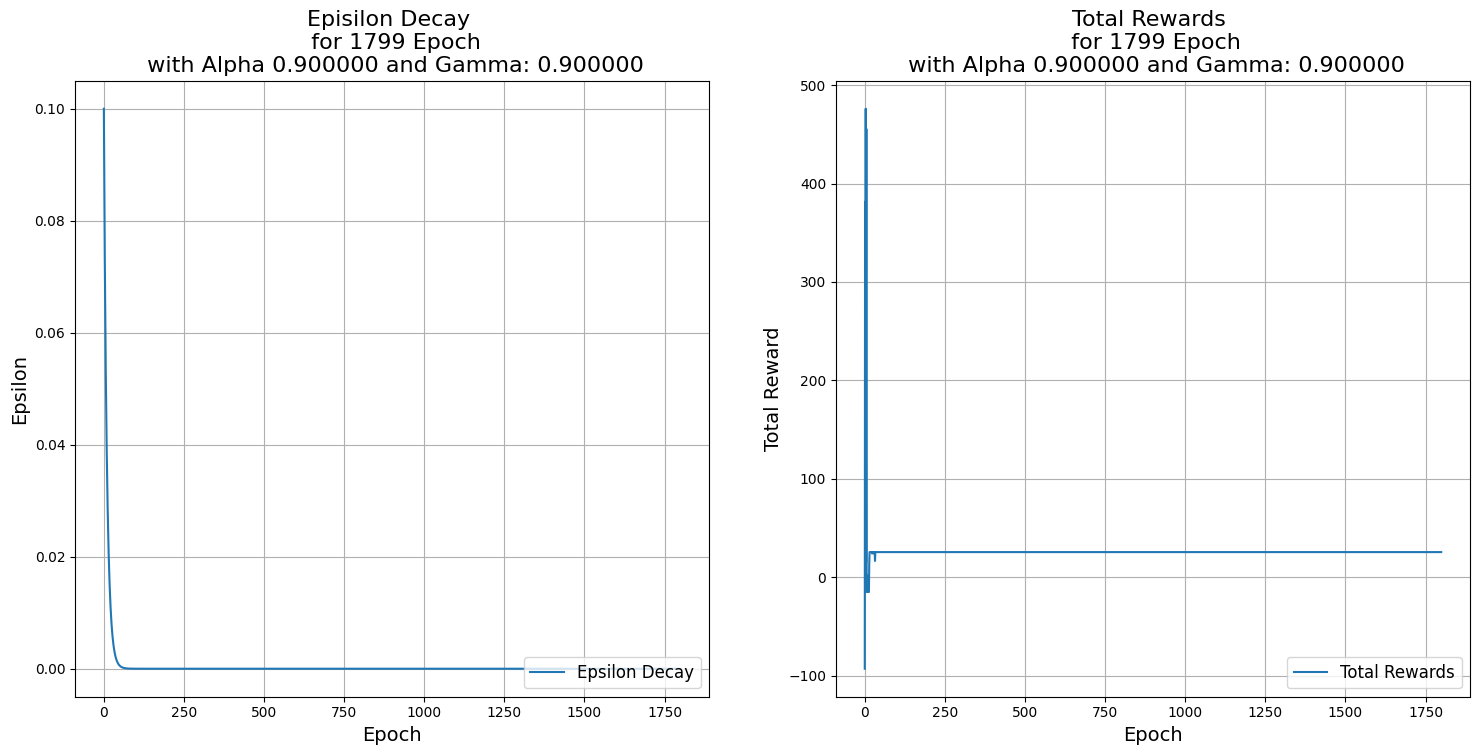

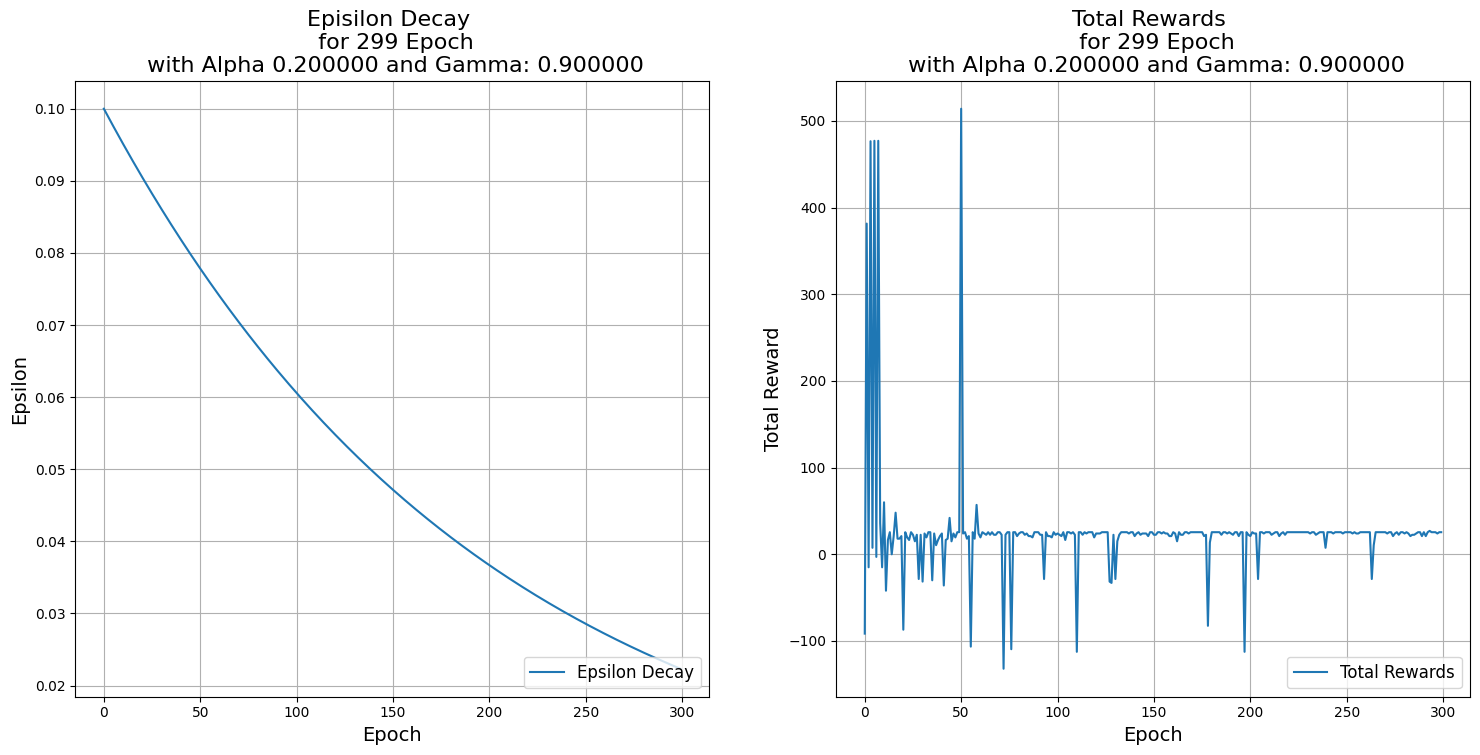

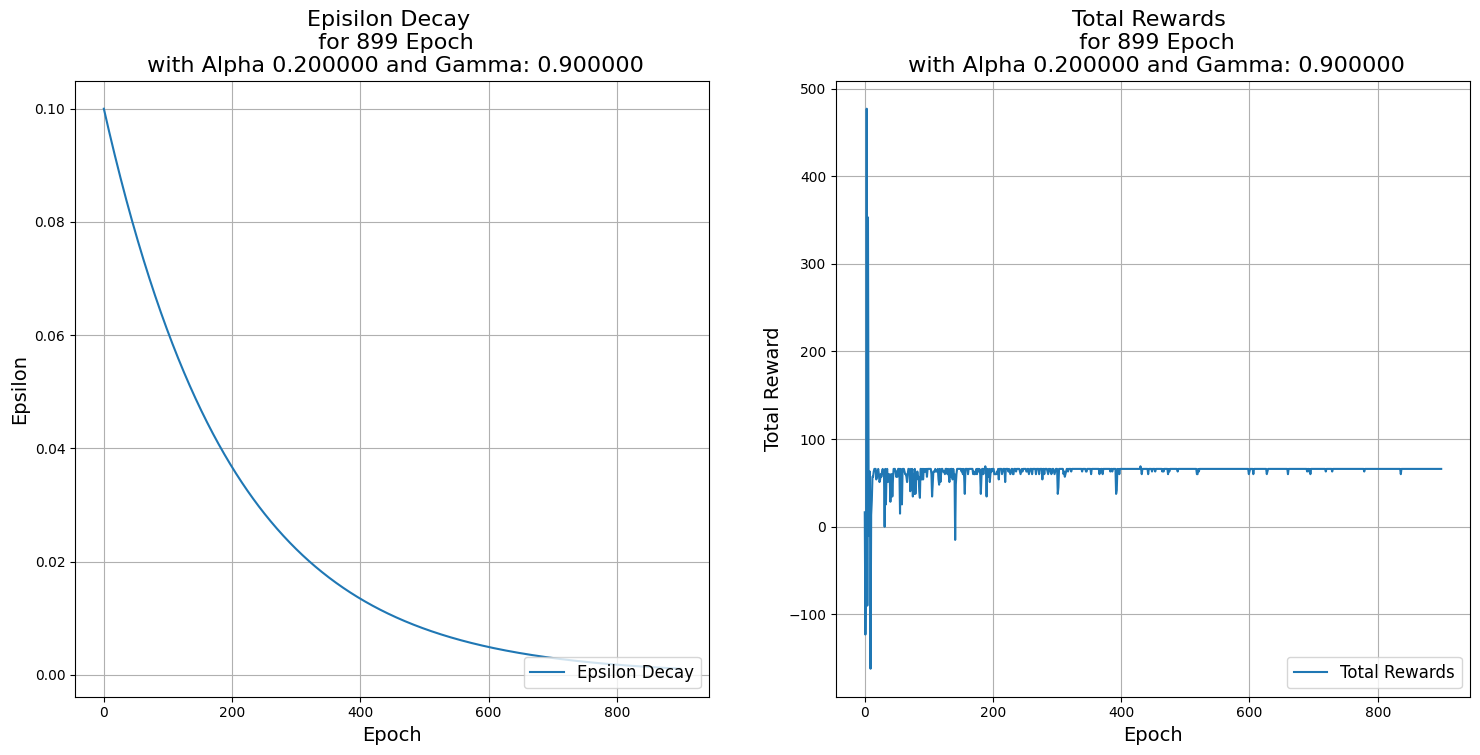

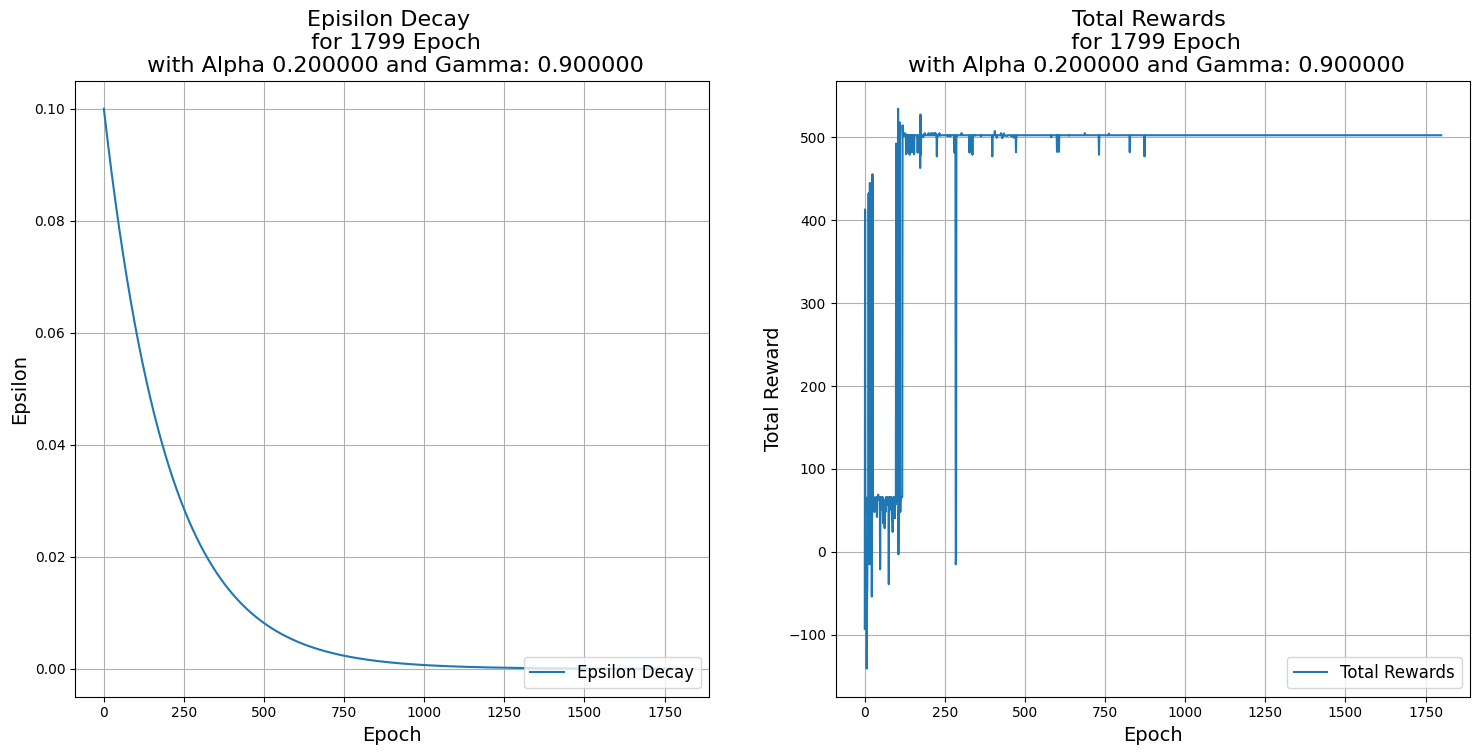

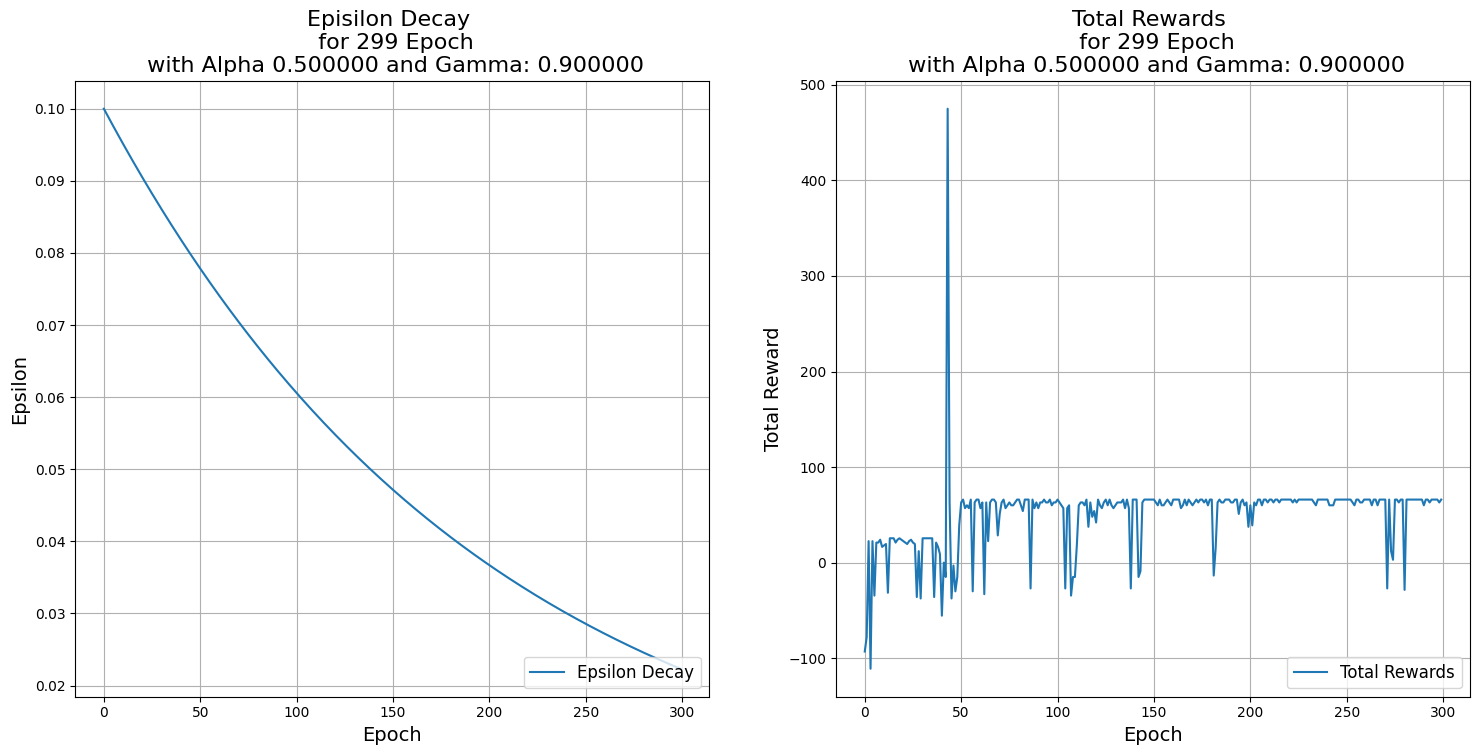

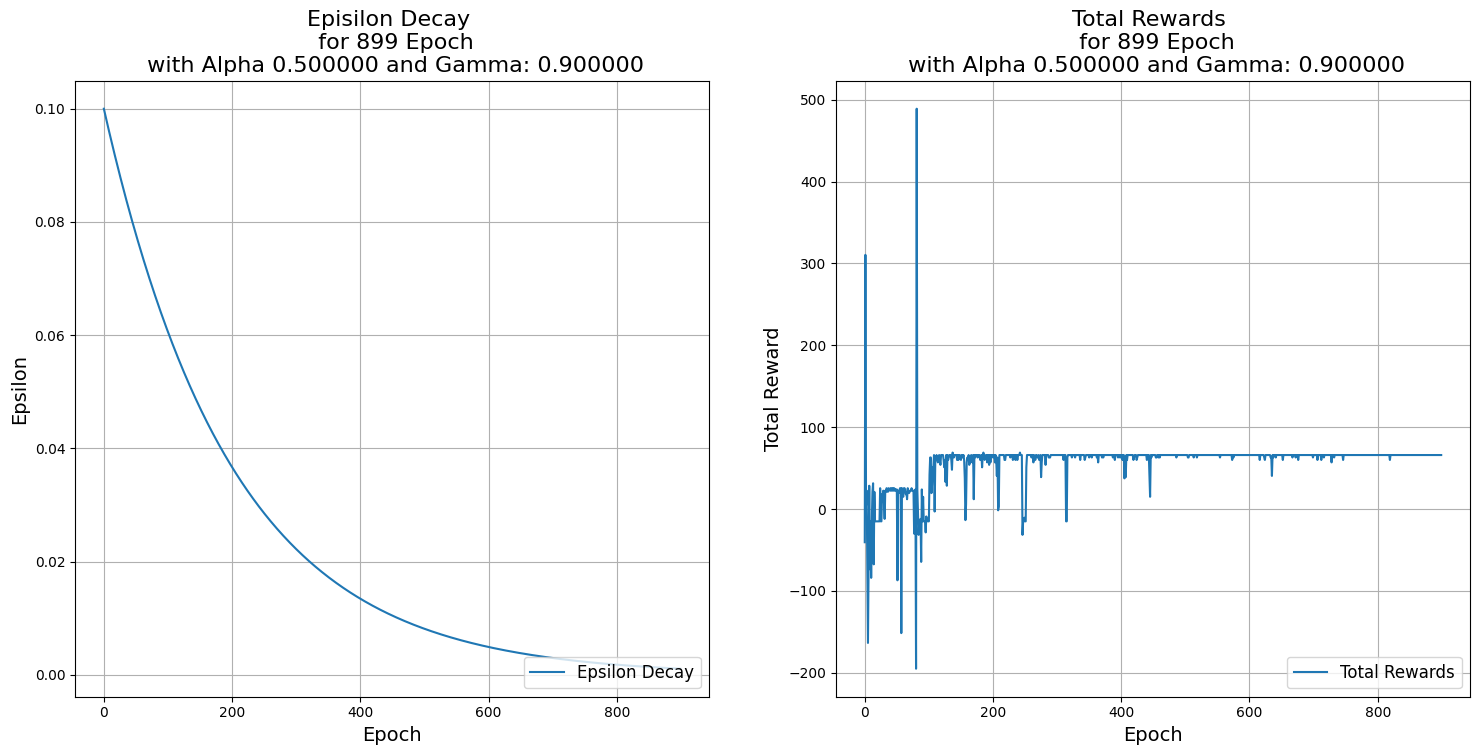

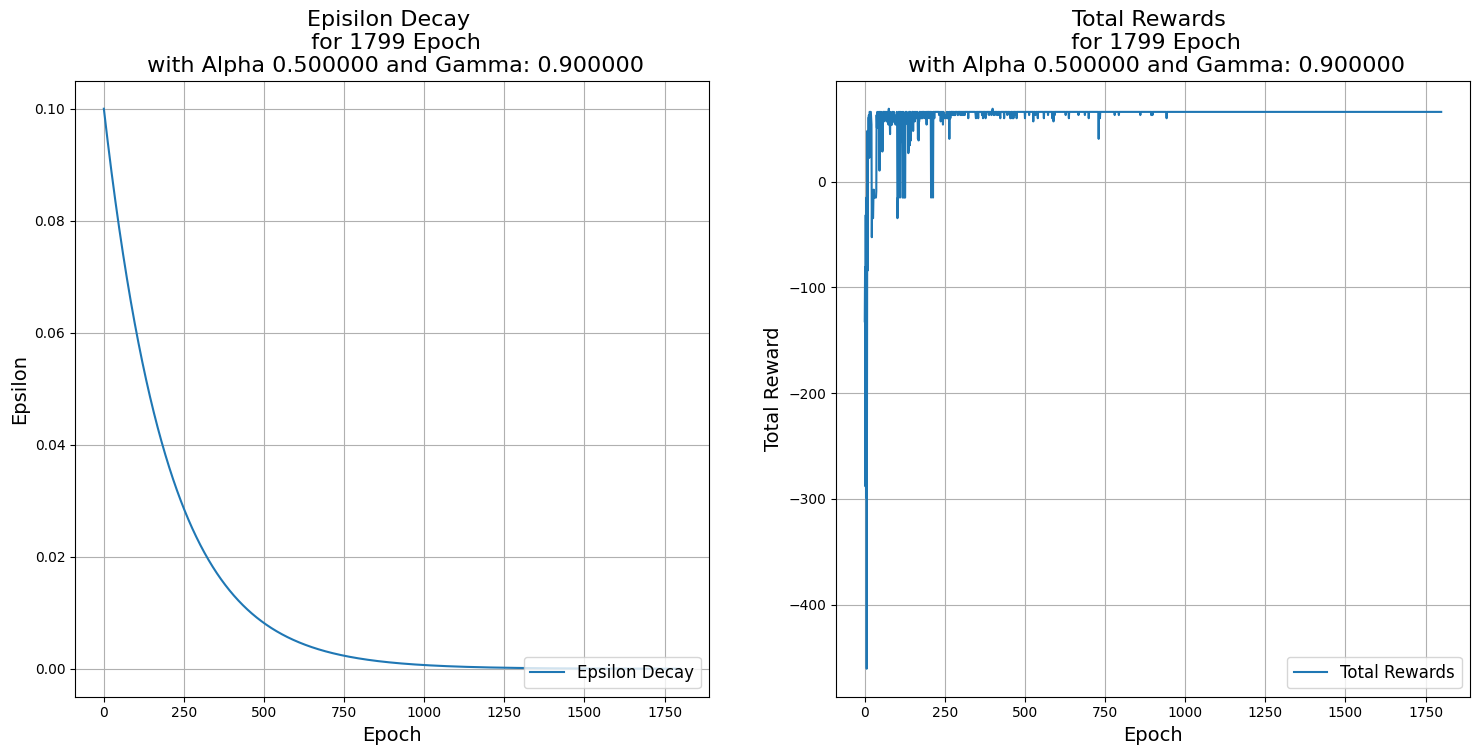

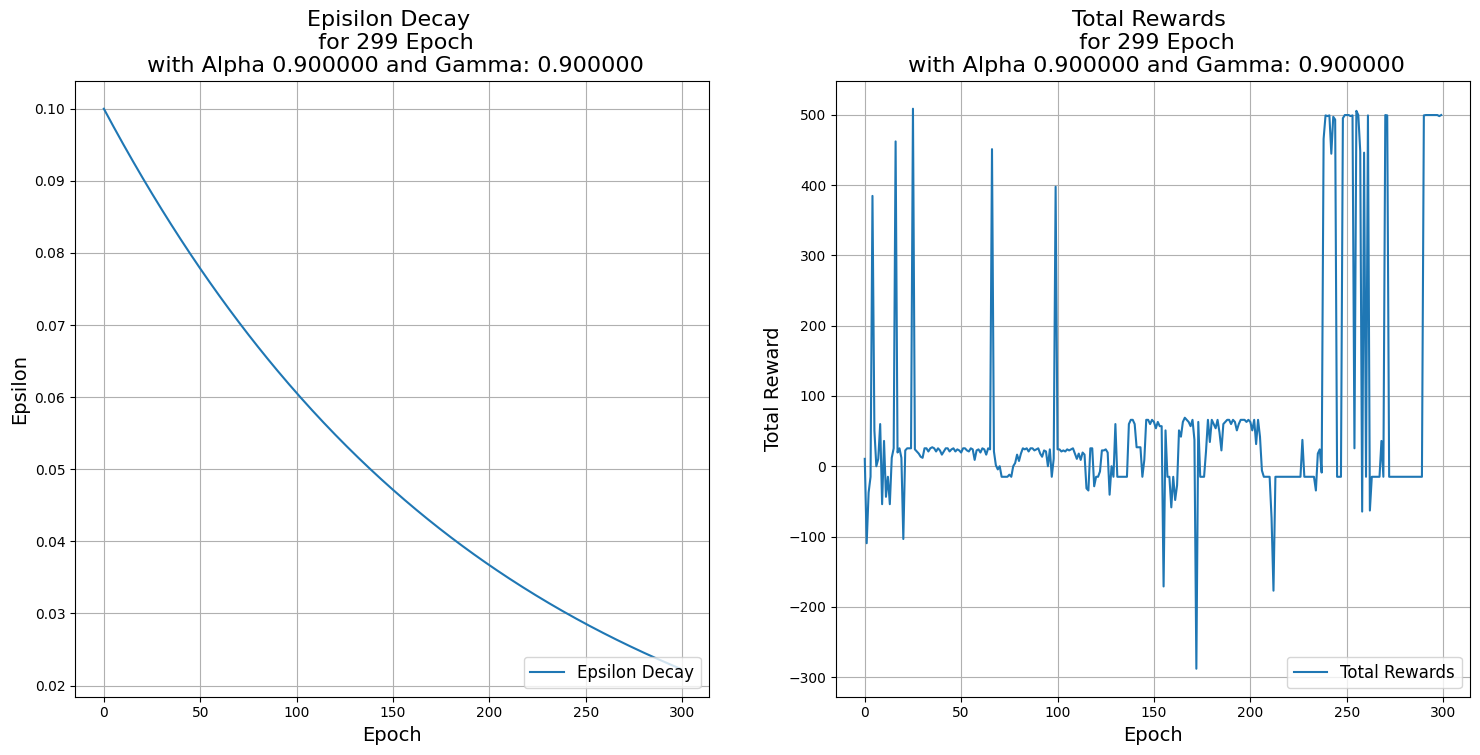

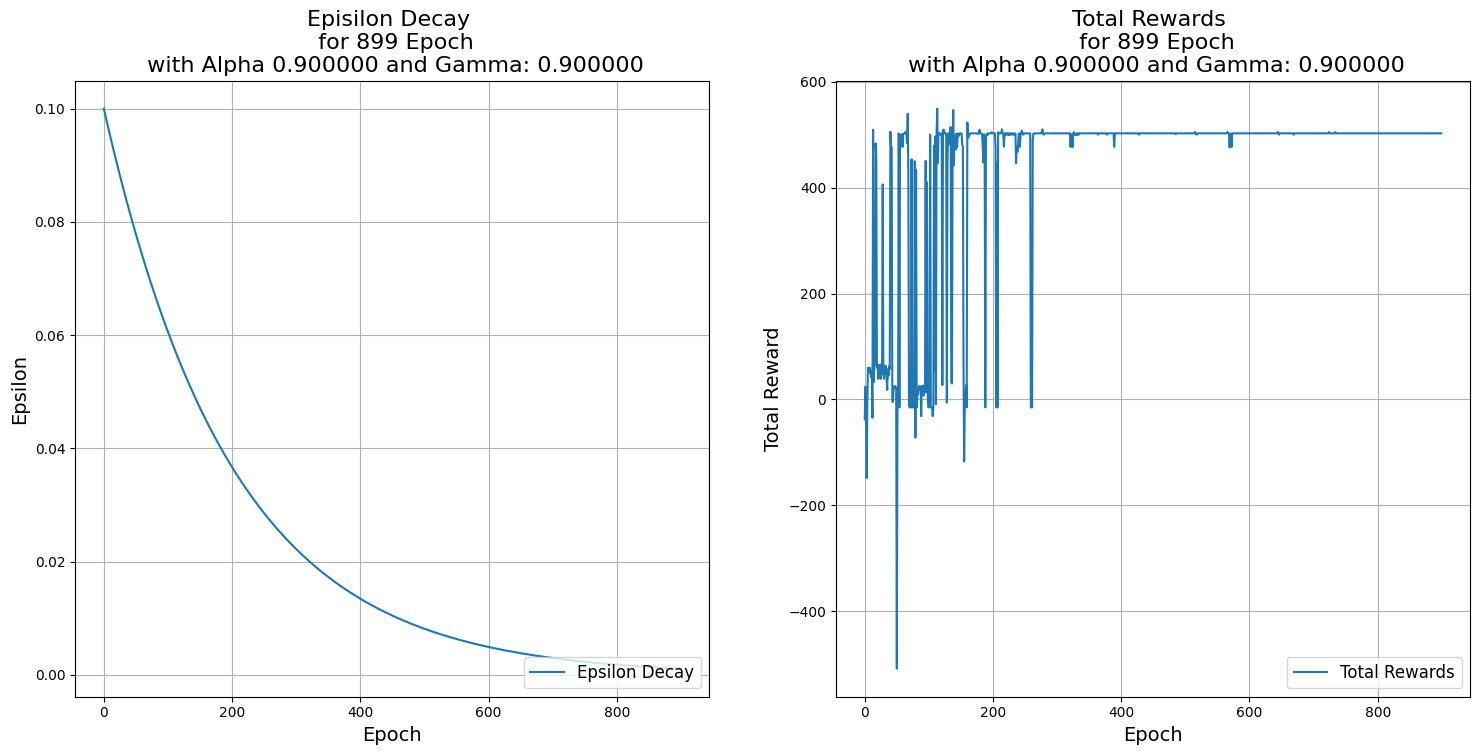

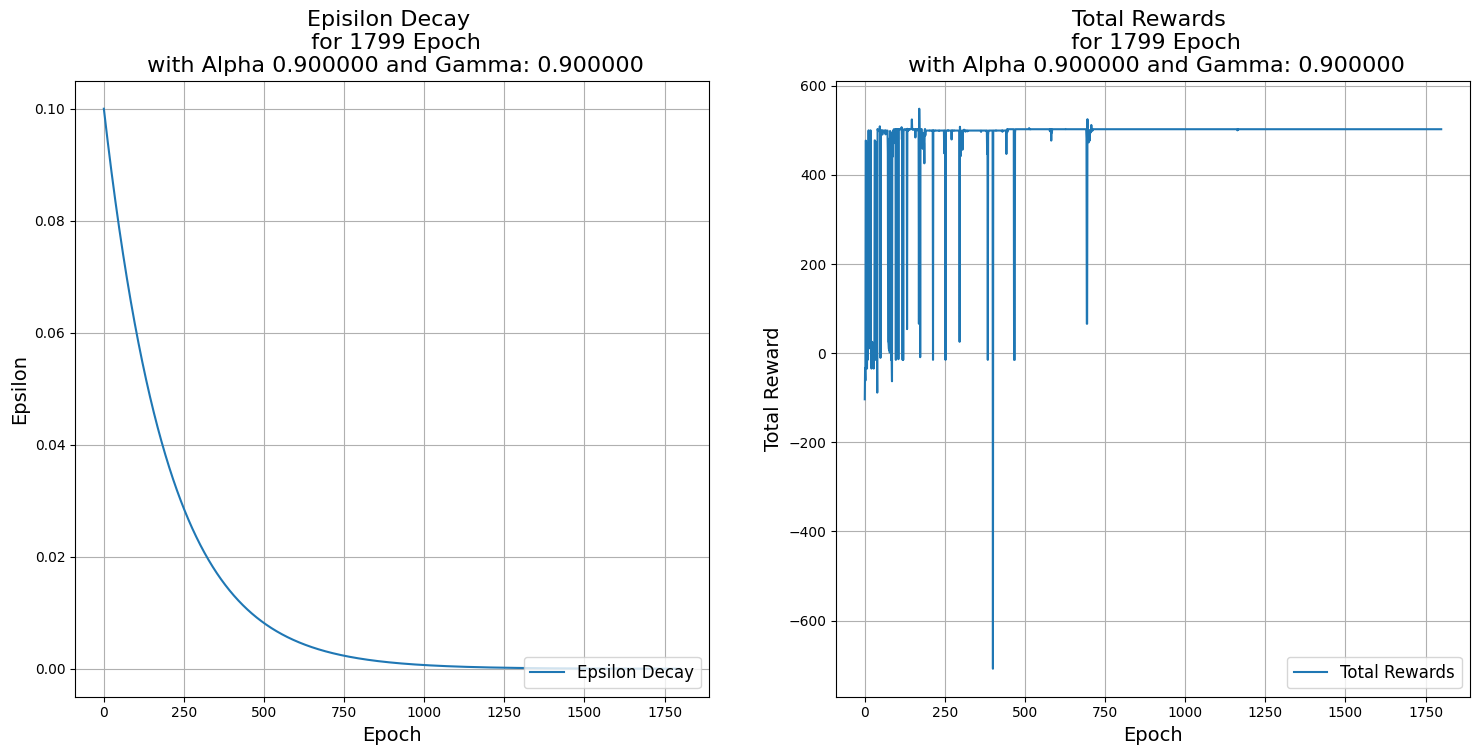

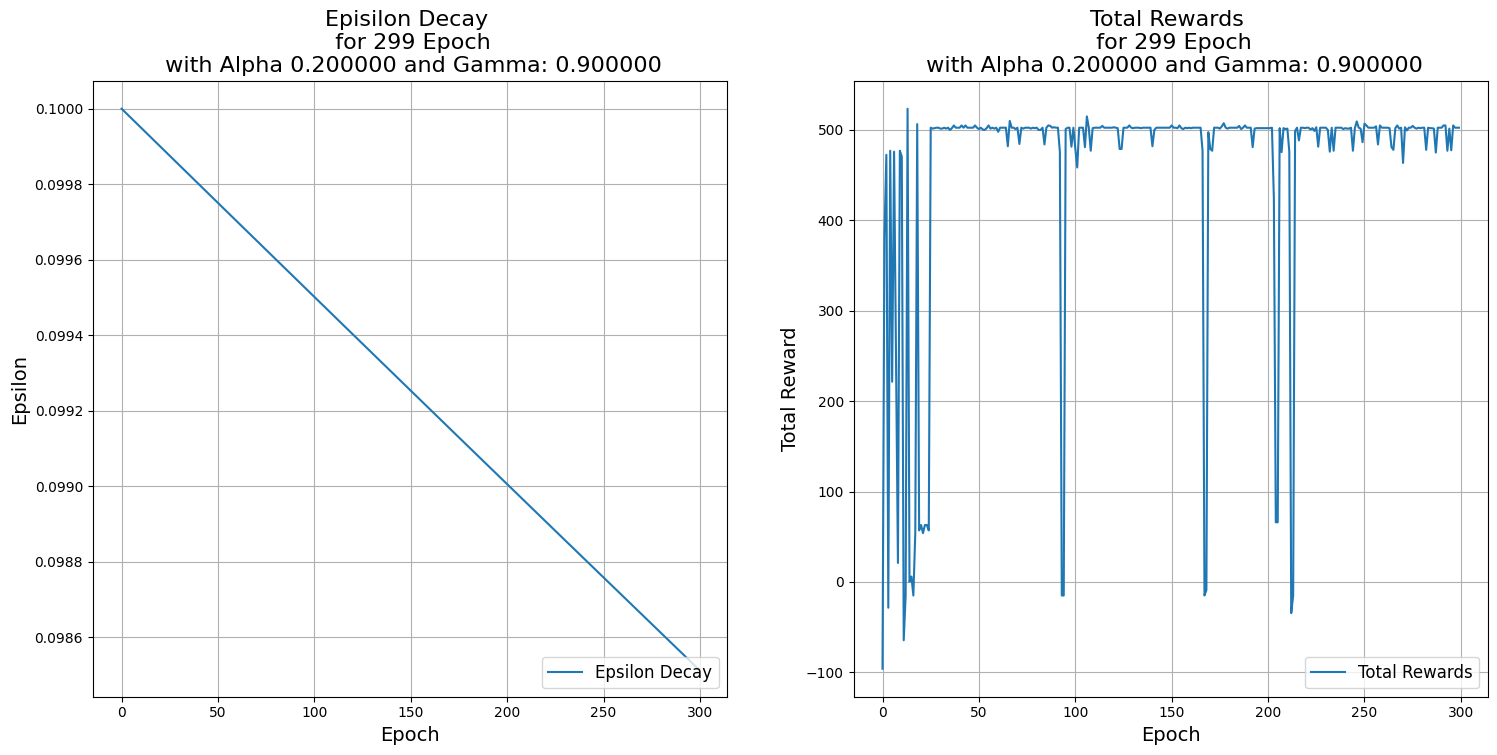

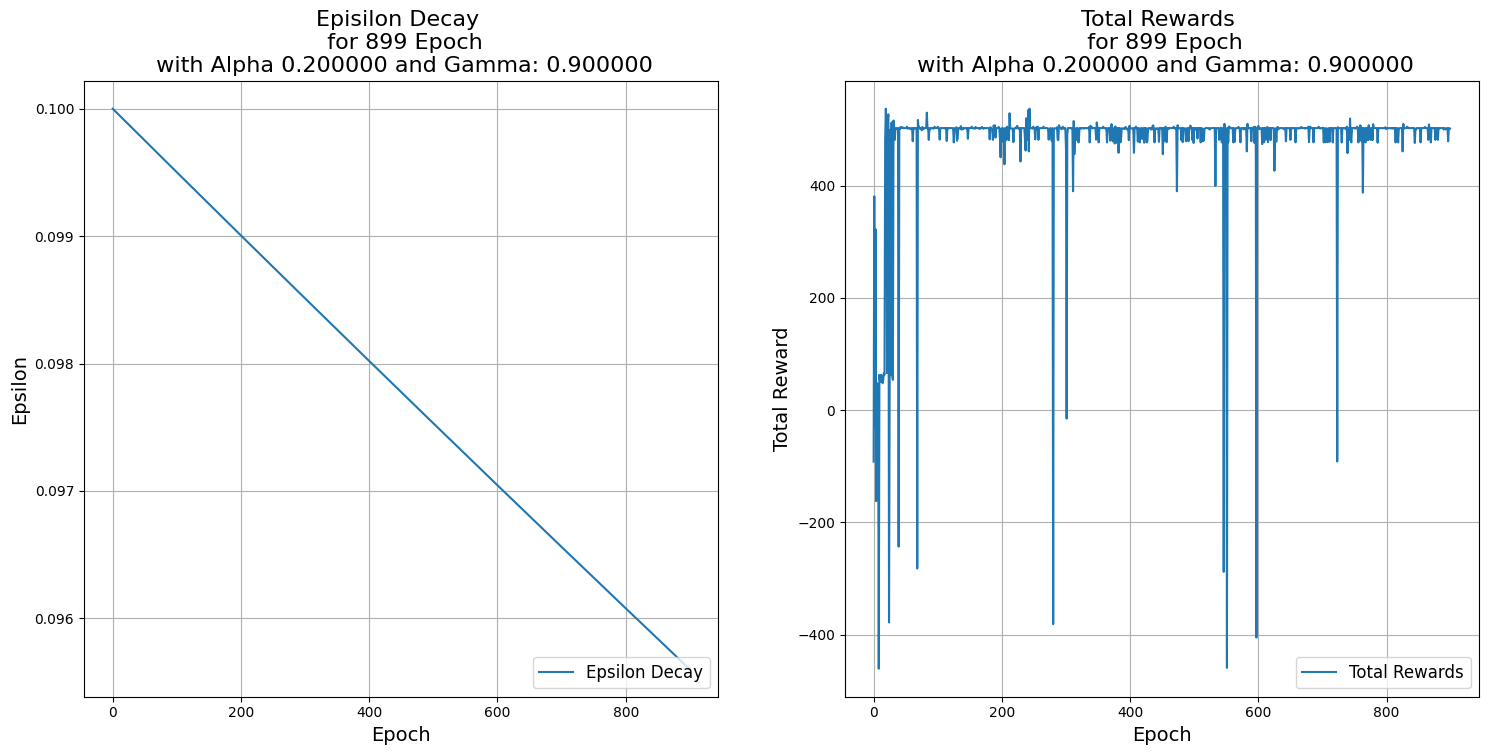

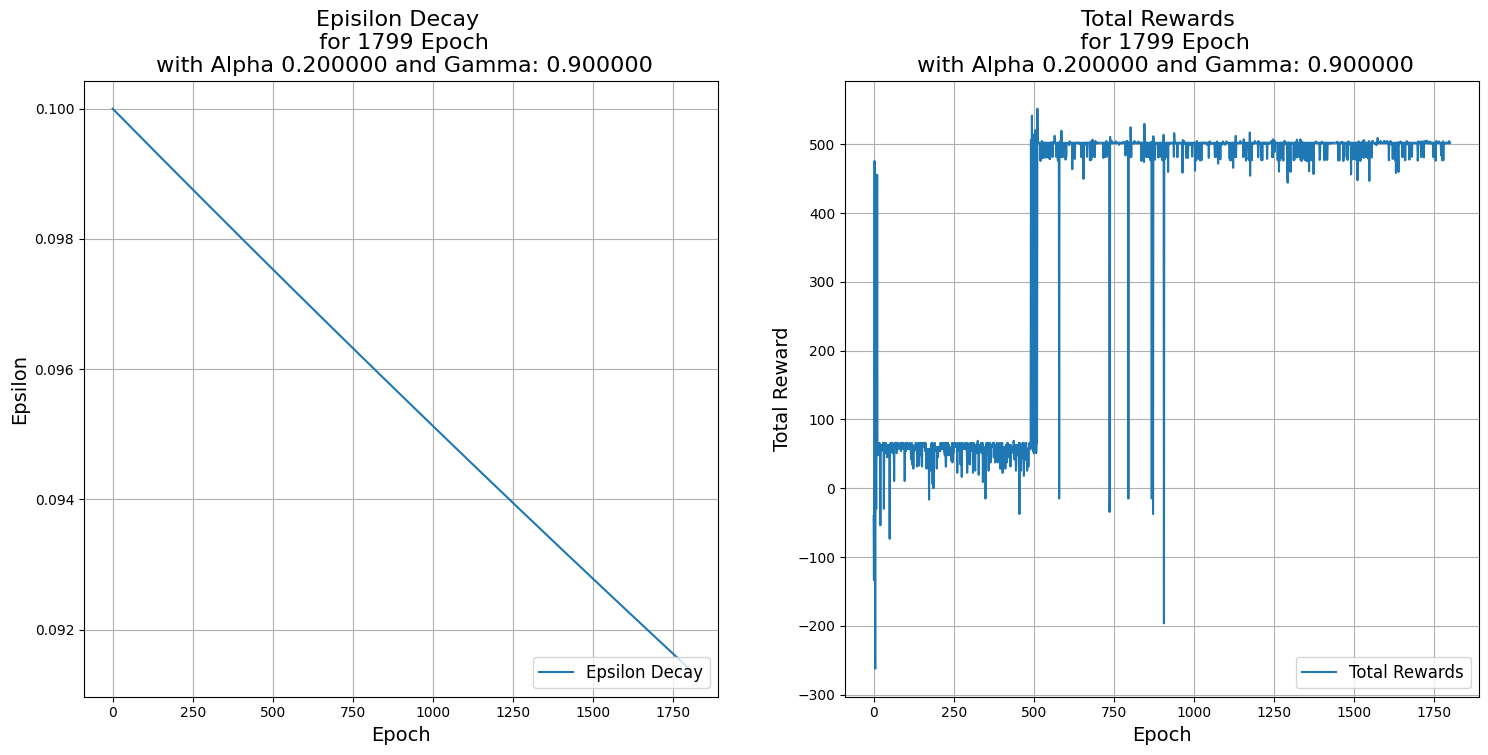

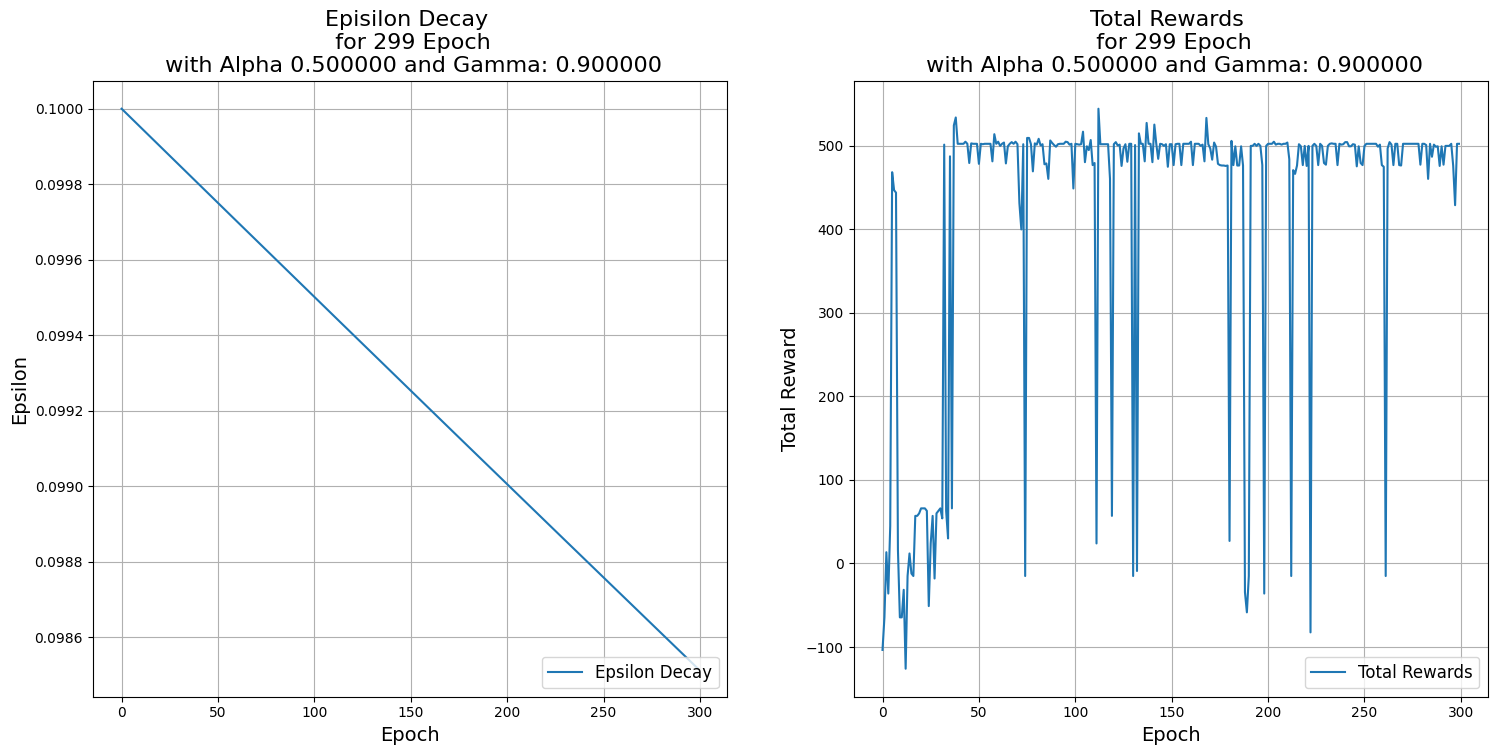

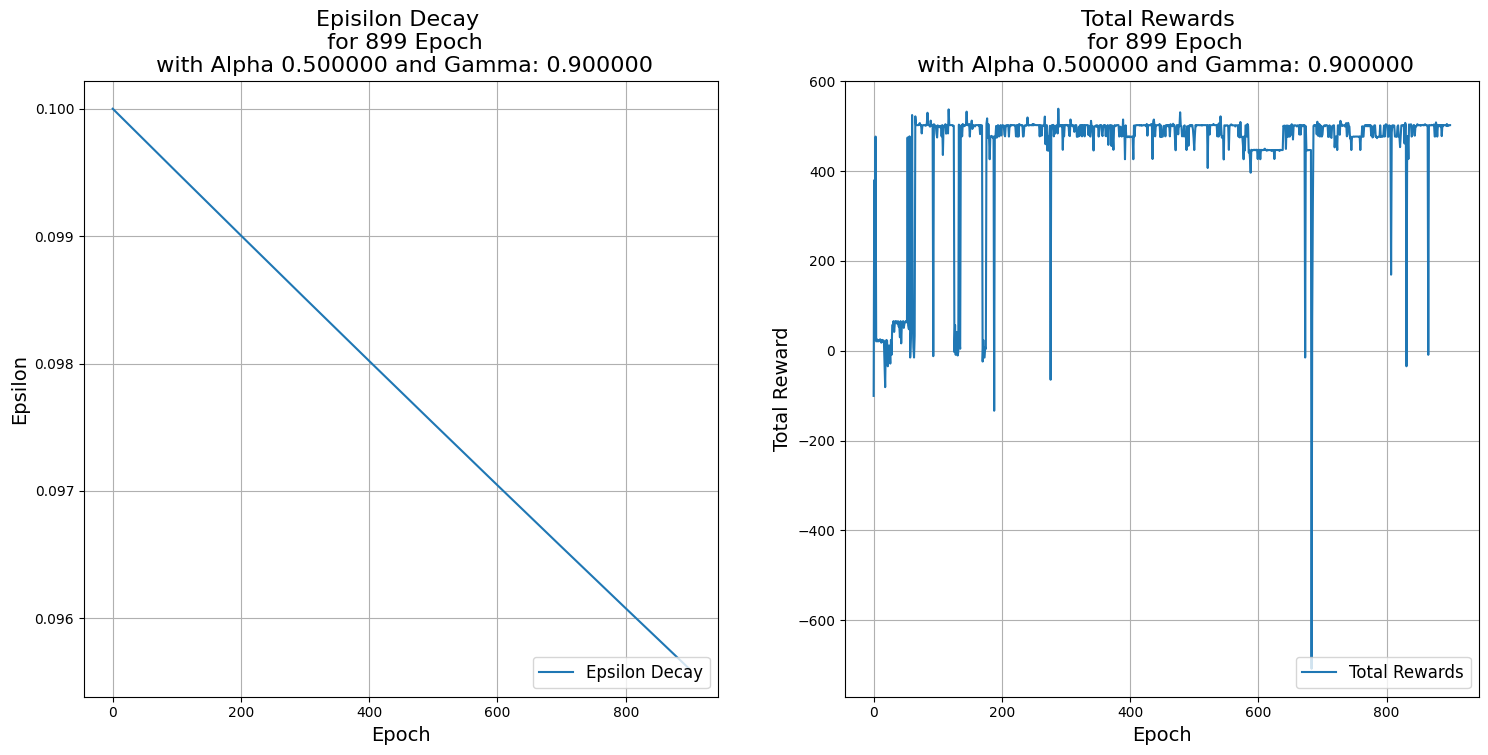

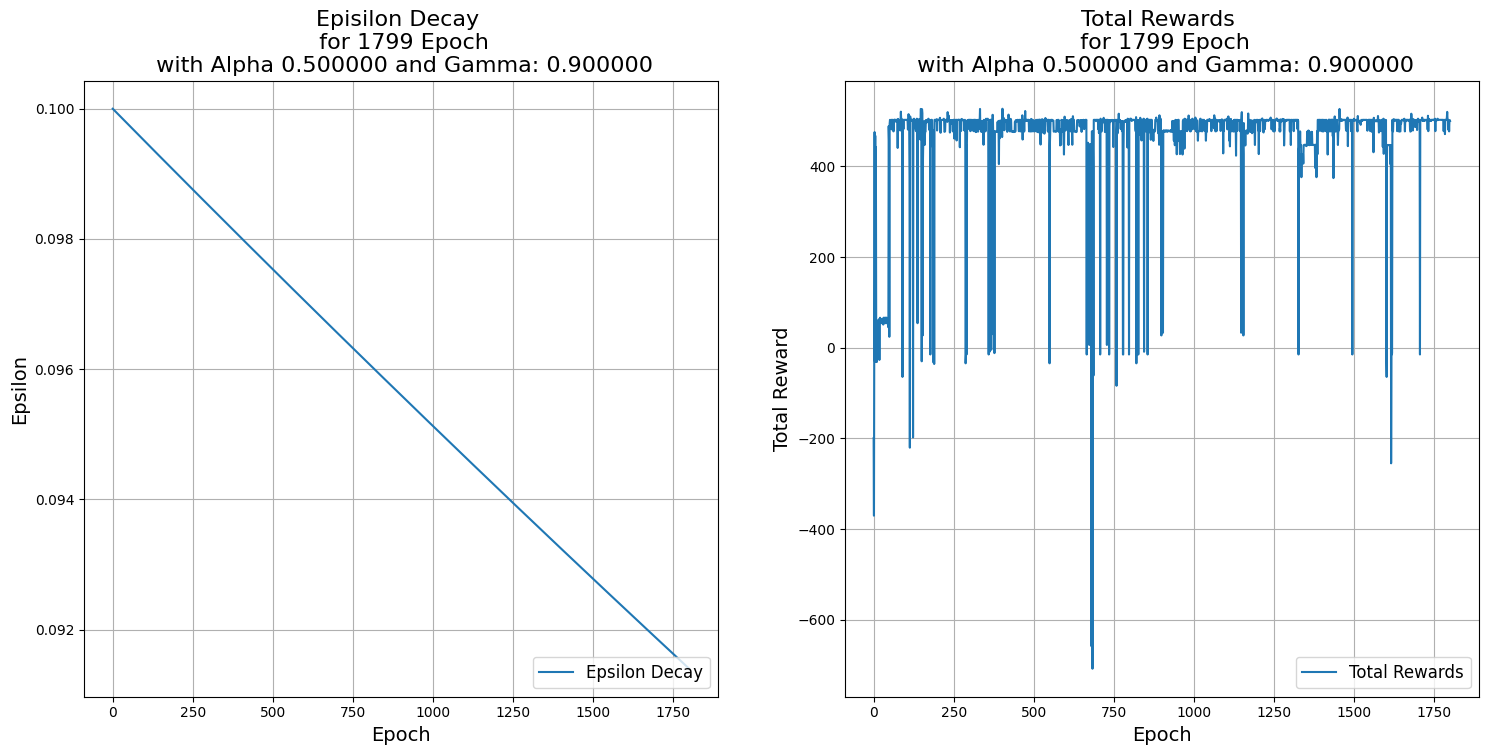

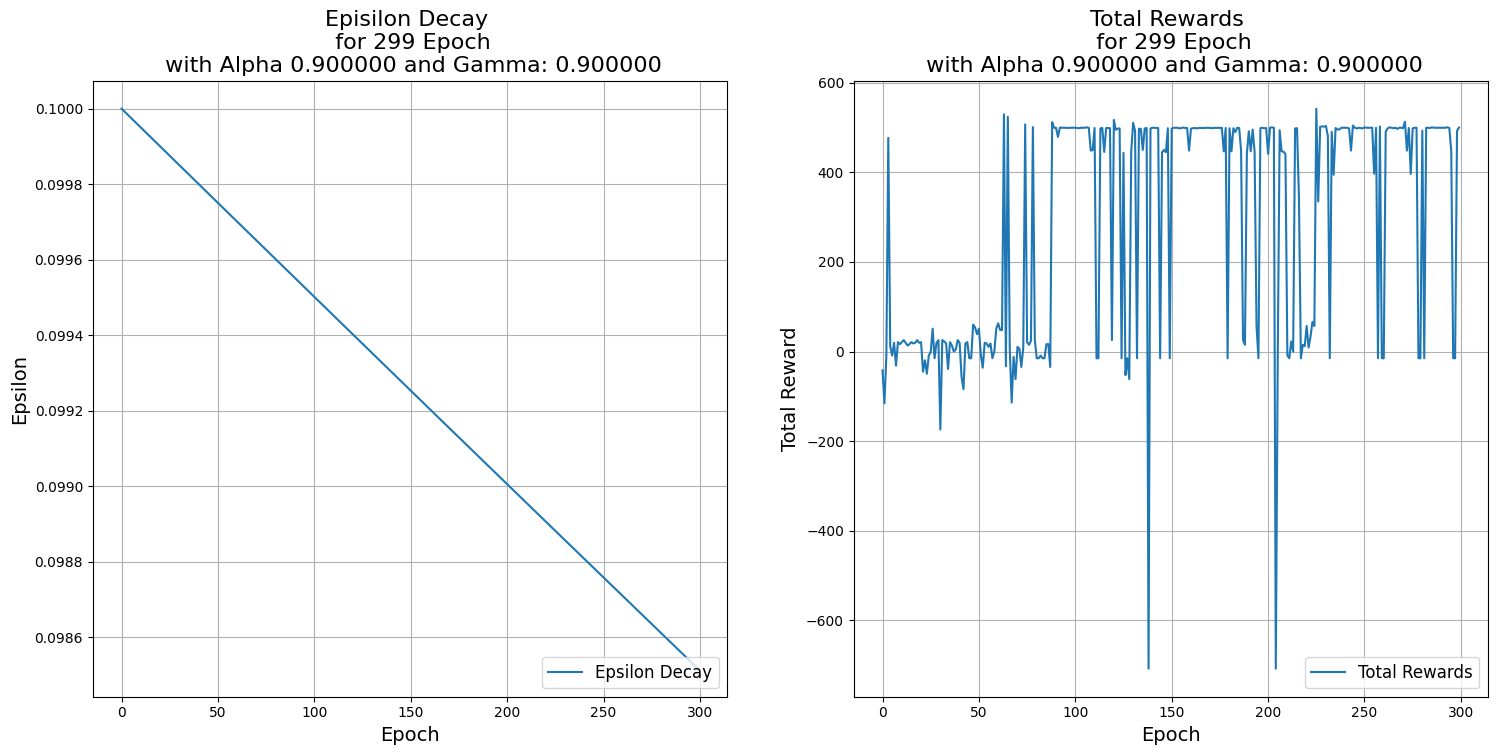

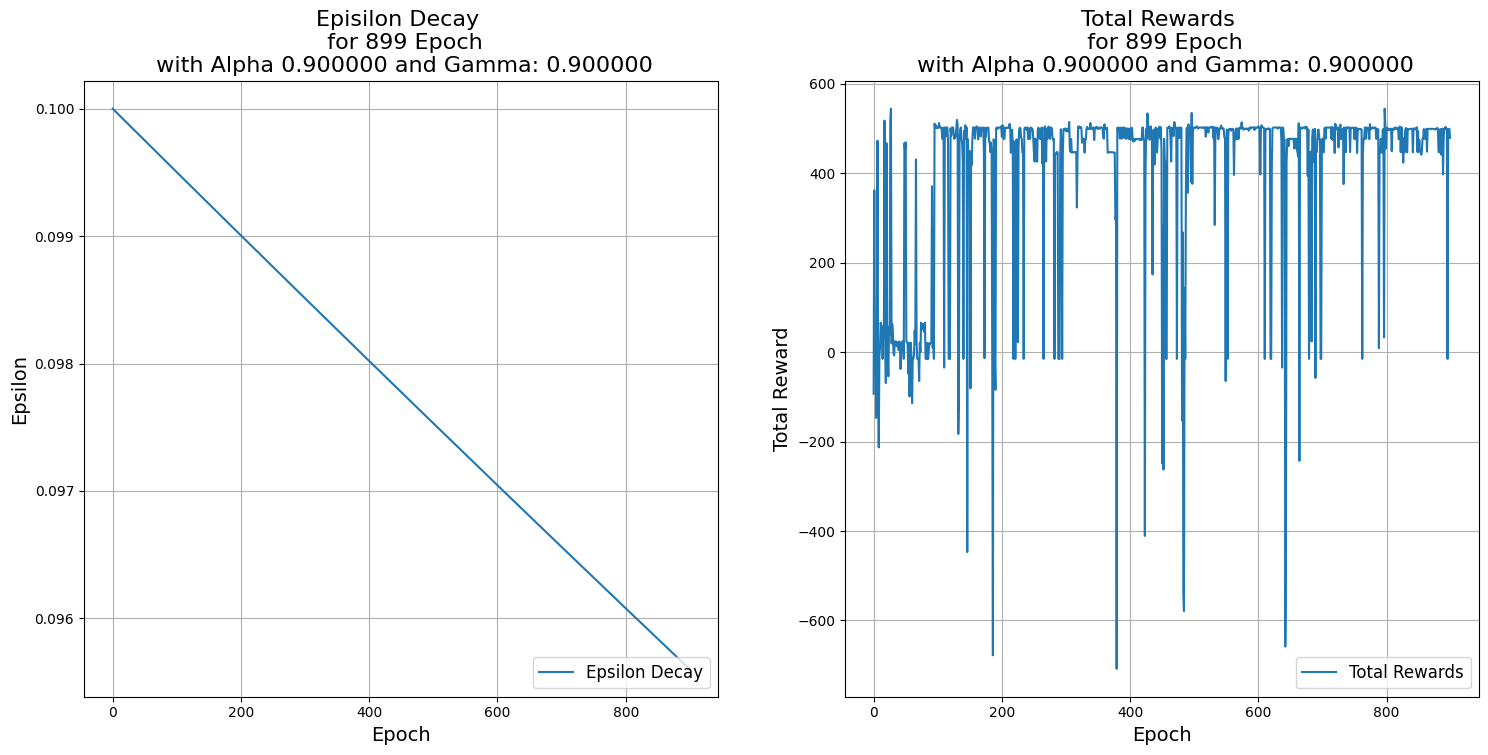

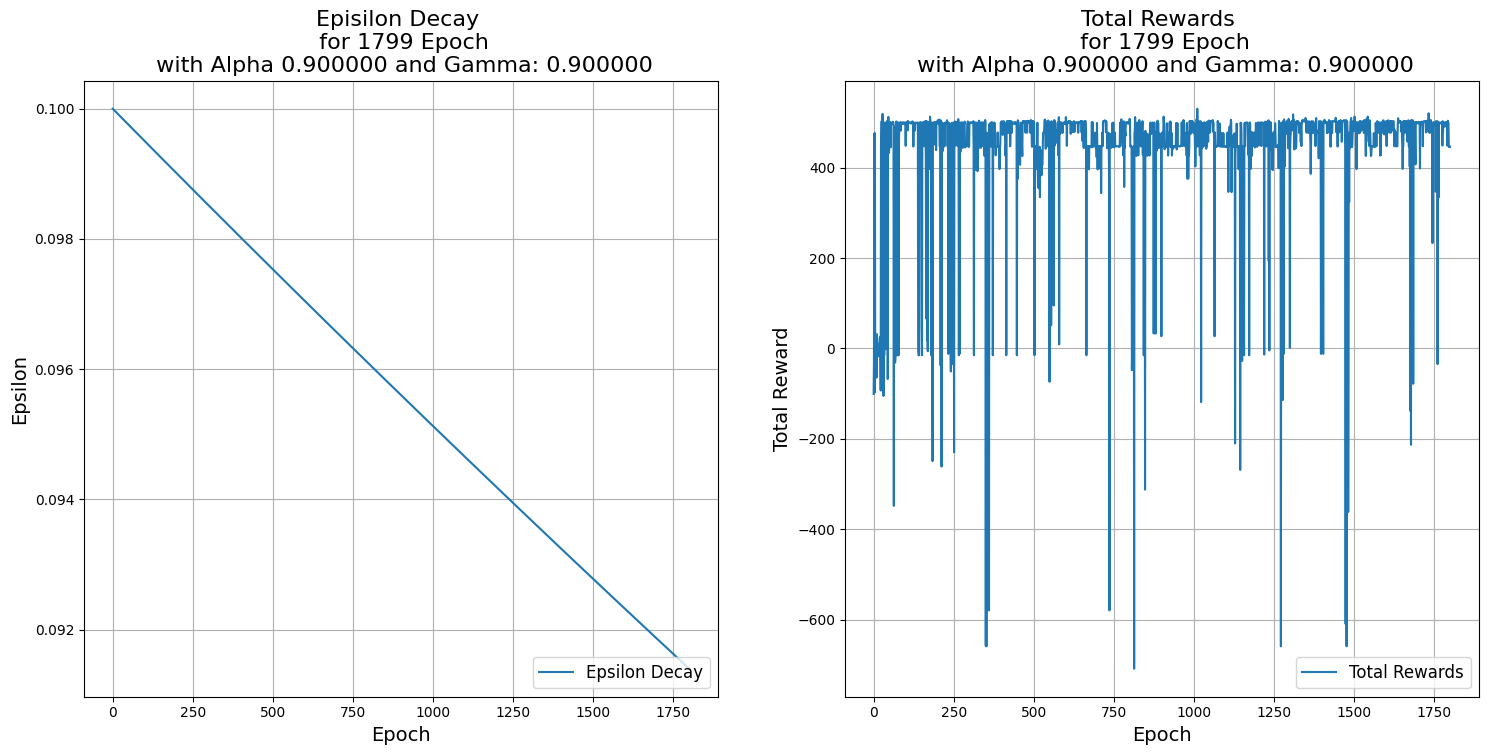

In [ ]:
decay_rate = [0.1,0.005,0.00005]
alpha = [0.2,0.5,0.9]
epoch = [300,900,1800]

#trying all possible combination to find best parameters 
for d in decay_rate:
  for a in alpha:
    for e in epoch:
      train(d,a,e)

## References:
•	https://towardsdatascience.com/intro-to-reinforcement-learning-temporal-difference-learning-sarsa-vs-q-learning
•	https://www.gymlibrary.dev/content/environment_creation/
•	https://matplotlib.org/stable/gallery/text_labels_and_annotations/demo_annotation_box.html
•	https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93action
•	https://pythonprogramming.net/q-learning-algorithm-reinforcement-learning-python-tutorial/
•	https://matplotlib.org/stable/api/offsetbox_api.html
